# **Credit Card Customer Retention Analytics**

## Business Understanding & Problem Statement

### Introduction
Financial institutions face significant revenue loss when credit card customers churn, with acquisition costs typically 5-25x higher than retention costs. This project analyzes a bank's credit card customer data to develop a comprehensive retention strategy through predictive modeling and customer segmentation.

### Business Objectives
1. **Identify churn risk factors**: Determine which behavioral patterns and customer attributes most strongly indicate churn risk
2. **Quantify revenue impact**: Assess the potential revenue loss associated with customer churn
3. **Segment customers**: Develop targeted retention strategies based on customer value and churn propensity
4. **Optimize retention ROI**: Prioritize retention efforts based on customer lifetime value and intervention costs

### Key Business Questions
1. **Churn Prediction**
   - What are the key indicators of potential customer churn?
   - How accurately can we predict which customers will leave?
   - What behavioral changes precede customer attrition?

2. **Financial Impact Assessment**  
   - What is the expected revenue loss from predicted churners?
   - Which customer segments represent the highest value at risk?
   - What is the optimal retention budget allocation based on customer value?

3. **Customer Segmentation & Intervention**
   - What distinct customer segments exist within our portfolio?
   - Which segments demonstrate the highest churn risk?
   - What targeted retention strategies should be deployed for each segment?

### Business Hypotheses
1. **Transaction Activity Hypothesis**: Customers with declining transaction counts in recent months are more likely to churn
2. **Utilization Ratio Hypothesis**: Customers with consistently low utilization ratios (<15%) are at higher risk of attrition
3. **Product Diversity Hypothesis**: Customers with fewer product relationships have higher churn probability
4. **Customer Service Hypothesis**: Increased contact frequency with customer service correlates with higher churn rates
5. **Customer Inactivity Hypothesis**: Extended periods of inactivity (>2 months) strongly predict imminent churn
6. **Customer Value Hypothesis**: High-value customers (high credit limits, high spending) have different churn factors than low-value customers

## Data Understanding
The dataset contains credit card customer information with demographic, relationship, and behavioral attributes. We'll conduct a thorough examination to understand data characteristics and quality.

In [131]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('ggplot')
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['grid.color'] = 'lightgray'
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['axes.grid'] = True
mpl.rcParams['font.size'] = 12

# Set custom color palette for consistent branding
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
sns.set_palette(sns.color_palette(color_palette))
# color_palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.set_theme(style='ticks')

In [132]:
# Load data
data_path = '/content/BankChurners.csv'
df = pd.read_csv(data_path)

In [133]:
# Standardize column names
df.columns = [x.lower() for x in df.columns]

In [134]:
# Convert target variable to binary format
df.rename(columns={'attrition_flag': 'churn_flag'}, inplace=True)
df['churn_flag'] = df['churn_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

In [135]:
# Convert gender to binary
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

In [136]:
# Drop client number (not predictive)
df.drop(columns=['clientnum'], inplace=True)

In [137]:
# Check data shape
print(f'Dataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns')

Dataset dimensions: 10127 rows and 20 columns


### Data Dictionary
Understanding the features is crucial for business interpretation:

| Feature | Description | Type | Business Relevance |
|---------|-------------|------|-------------------|
| churn_flag | Whether customer closed account (1) or not (0) | Binary | Target variable |
| customer_age | Customer's age in years | Numeric | Demographic segmentation |
| gender | Gender (1=Male, 0=Female) | Binary | Demographic segmentation |
| dependent_count | Number of dependents | Numeric | Financial responsibility indicator |
| education_level | Educational qualification | Categorical | Socioeconomic indicator |
| marital_status | Marital status | Categorical | Lifecycle stage indicator |
| income_category | Annual income bracket | Categorical | Financial capacity indicator |
| card_category | Card type (Blue, Silver, Gold, Platinum) | Categorical | Product tier/customer value |
| months_on_book | Length of customer relationship | Numeric | Customer tenure |
| total_relationship_count | Number of products held | Numeric | Relationship depth |
| months_inactive_12_mon | Months inactive in last year | Numeric | Disengagement indicator |
| contacts_count_12_mon | Contact frequency in last year | Numeric | Service satisfaction proxy |
| credit_limit | Credit card limit | Numeric | Customer value/trust indicator |
| total_revolving_bal | Revolving balance | Numeric | Product usage intensity |
| avg_open_to_buy | Available credit (12-month avg) | Numeric | Credit utilization indicator |
| total_amt_chng_q4_q1 | Transaction amount change (Q4 vs Q1) | Numeric | Spending trajectory |
| total_trans_amt | Total transaction amount (12 months) | Numeric | Customer value metric |
| total_trans_ct | Total transaction count (12 months) | Numeric | Engagement metric |
| total_ct_chng_q4_q1 | Transaction count change (Q4 vs Q1) | Numeric | Engagement trajectory |
| avg_utilization_ratio | Average card utilization ratio | Numeric | Product usage intensity |

## Exploratory Data Analysis (EDA)

### **Class Distribution Analysis**

- Understanding the target variable distribution helps quantify the churn problem scale.

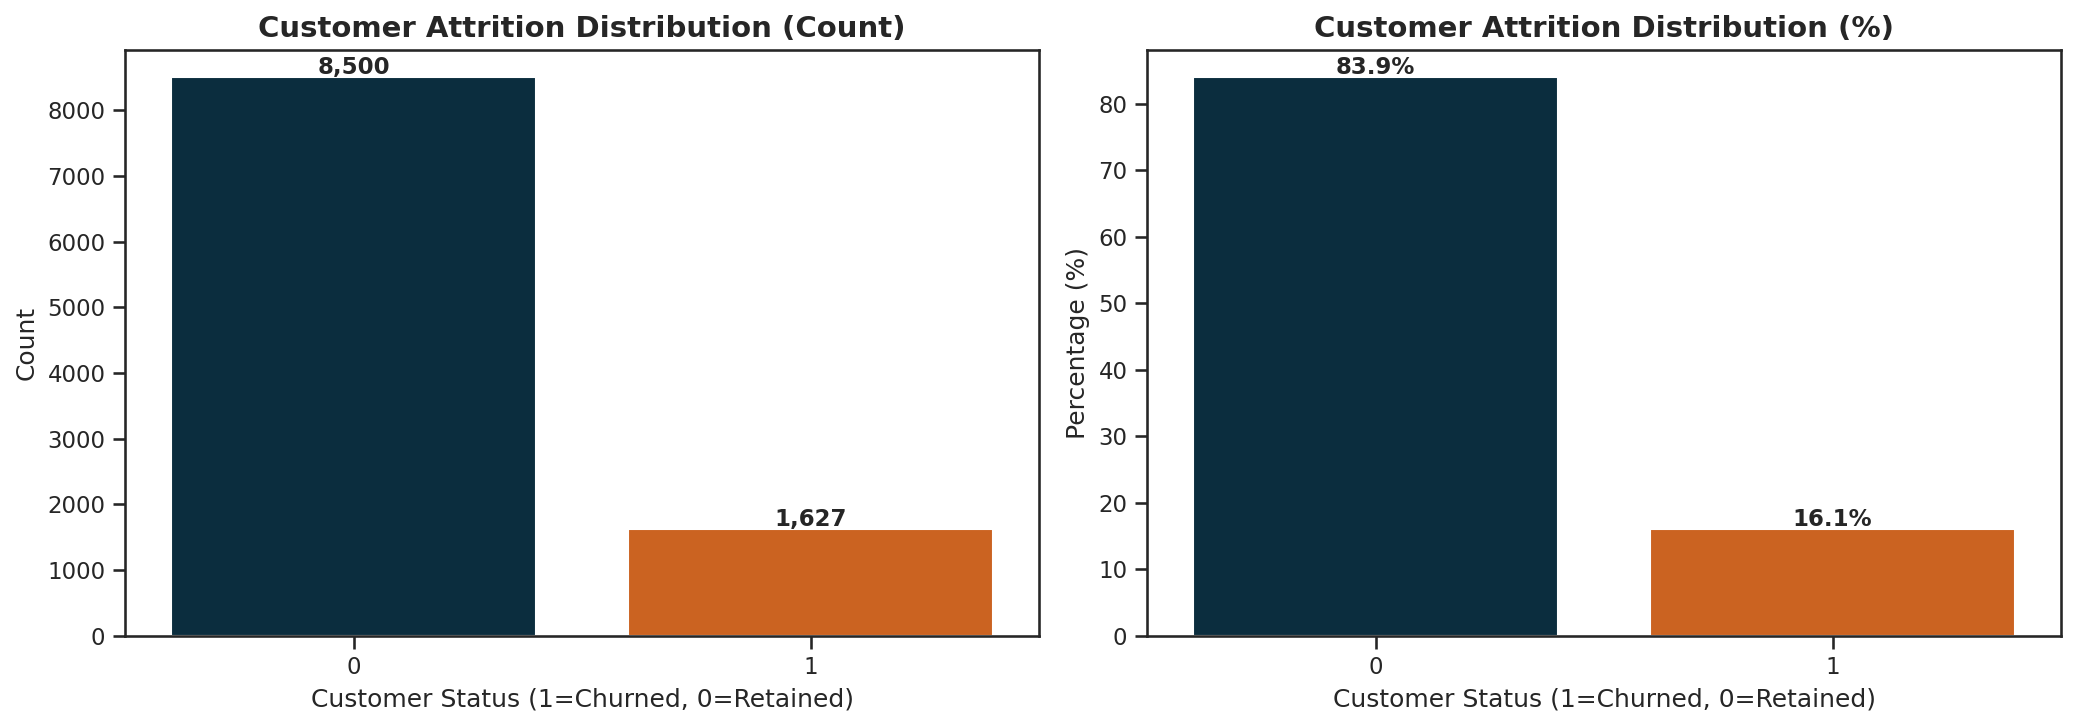

In [138]:
# Analyze churn distribution
churn_counts = df['churn_flag'].value_counts()
churn_percentage = 100 * df['churn_flag'].value_counts(normalize=True)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot counts
sns.barplot(x=churn_counts.index, y=churn_counts.values, ax=ax1, hue=churn_counts.index, palette=color_palette, legend=False)
ax1.set_title('Customer Attrition Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Customer Status (1=Churned, 0=Retained)', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

# Add count labels
for i, count in enumerate(churn_counts.values):
    ax1.text(i, count + 50, f"{count:,}", ha='center', fontsize=11, fontweight='bold')


# Plot percentages
sns.barplot(x=churn_percentage.index, y=churn_percentage.values, ax=ax2, hue=churn_percentage.index, palette=color_palette, legend=False)
ax2.set_title('Customer Attrition Distribution (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Customer Status (1=Churned, 0=Retained)', fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12)

# Add percentage labels
for i, pct in enumerate(churn_percentage.values):
    ax2.text(i, pct + 0.5, f"{pct:.1f}%", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

**Insights:**

The dataset shows a 16.1% churn rate, which is concerning given industry benchmarks typically target <10% for credit card products. This indicates a significant retention opportunity.

### Customer Demographics Analysis
- Examining customer characteristics helps identify demographic-based churn patterns.


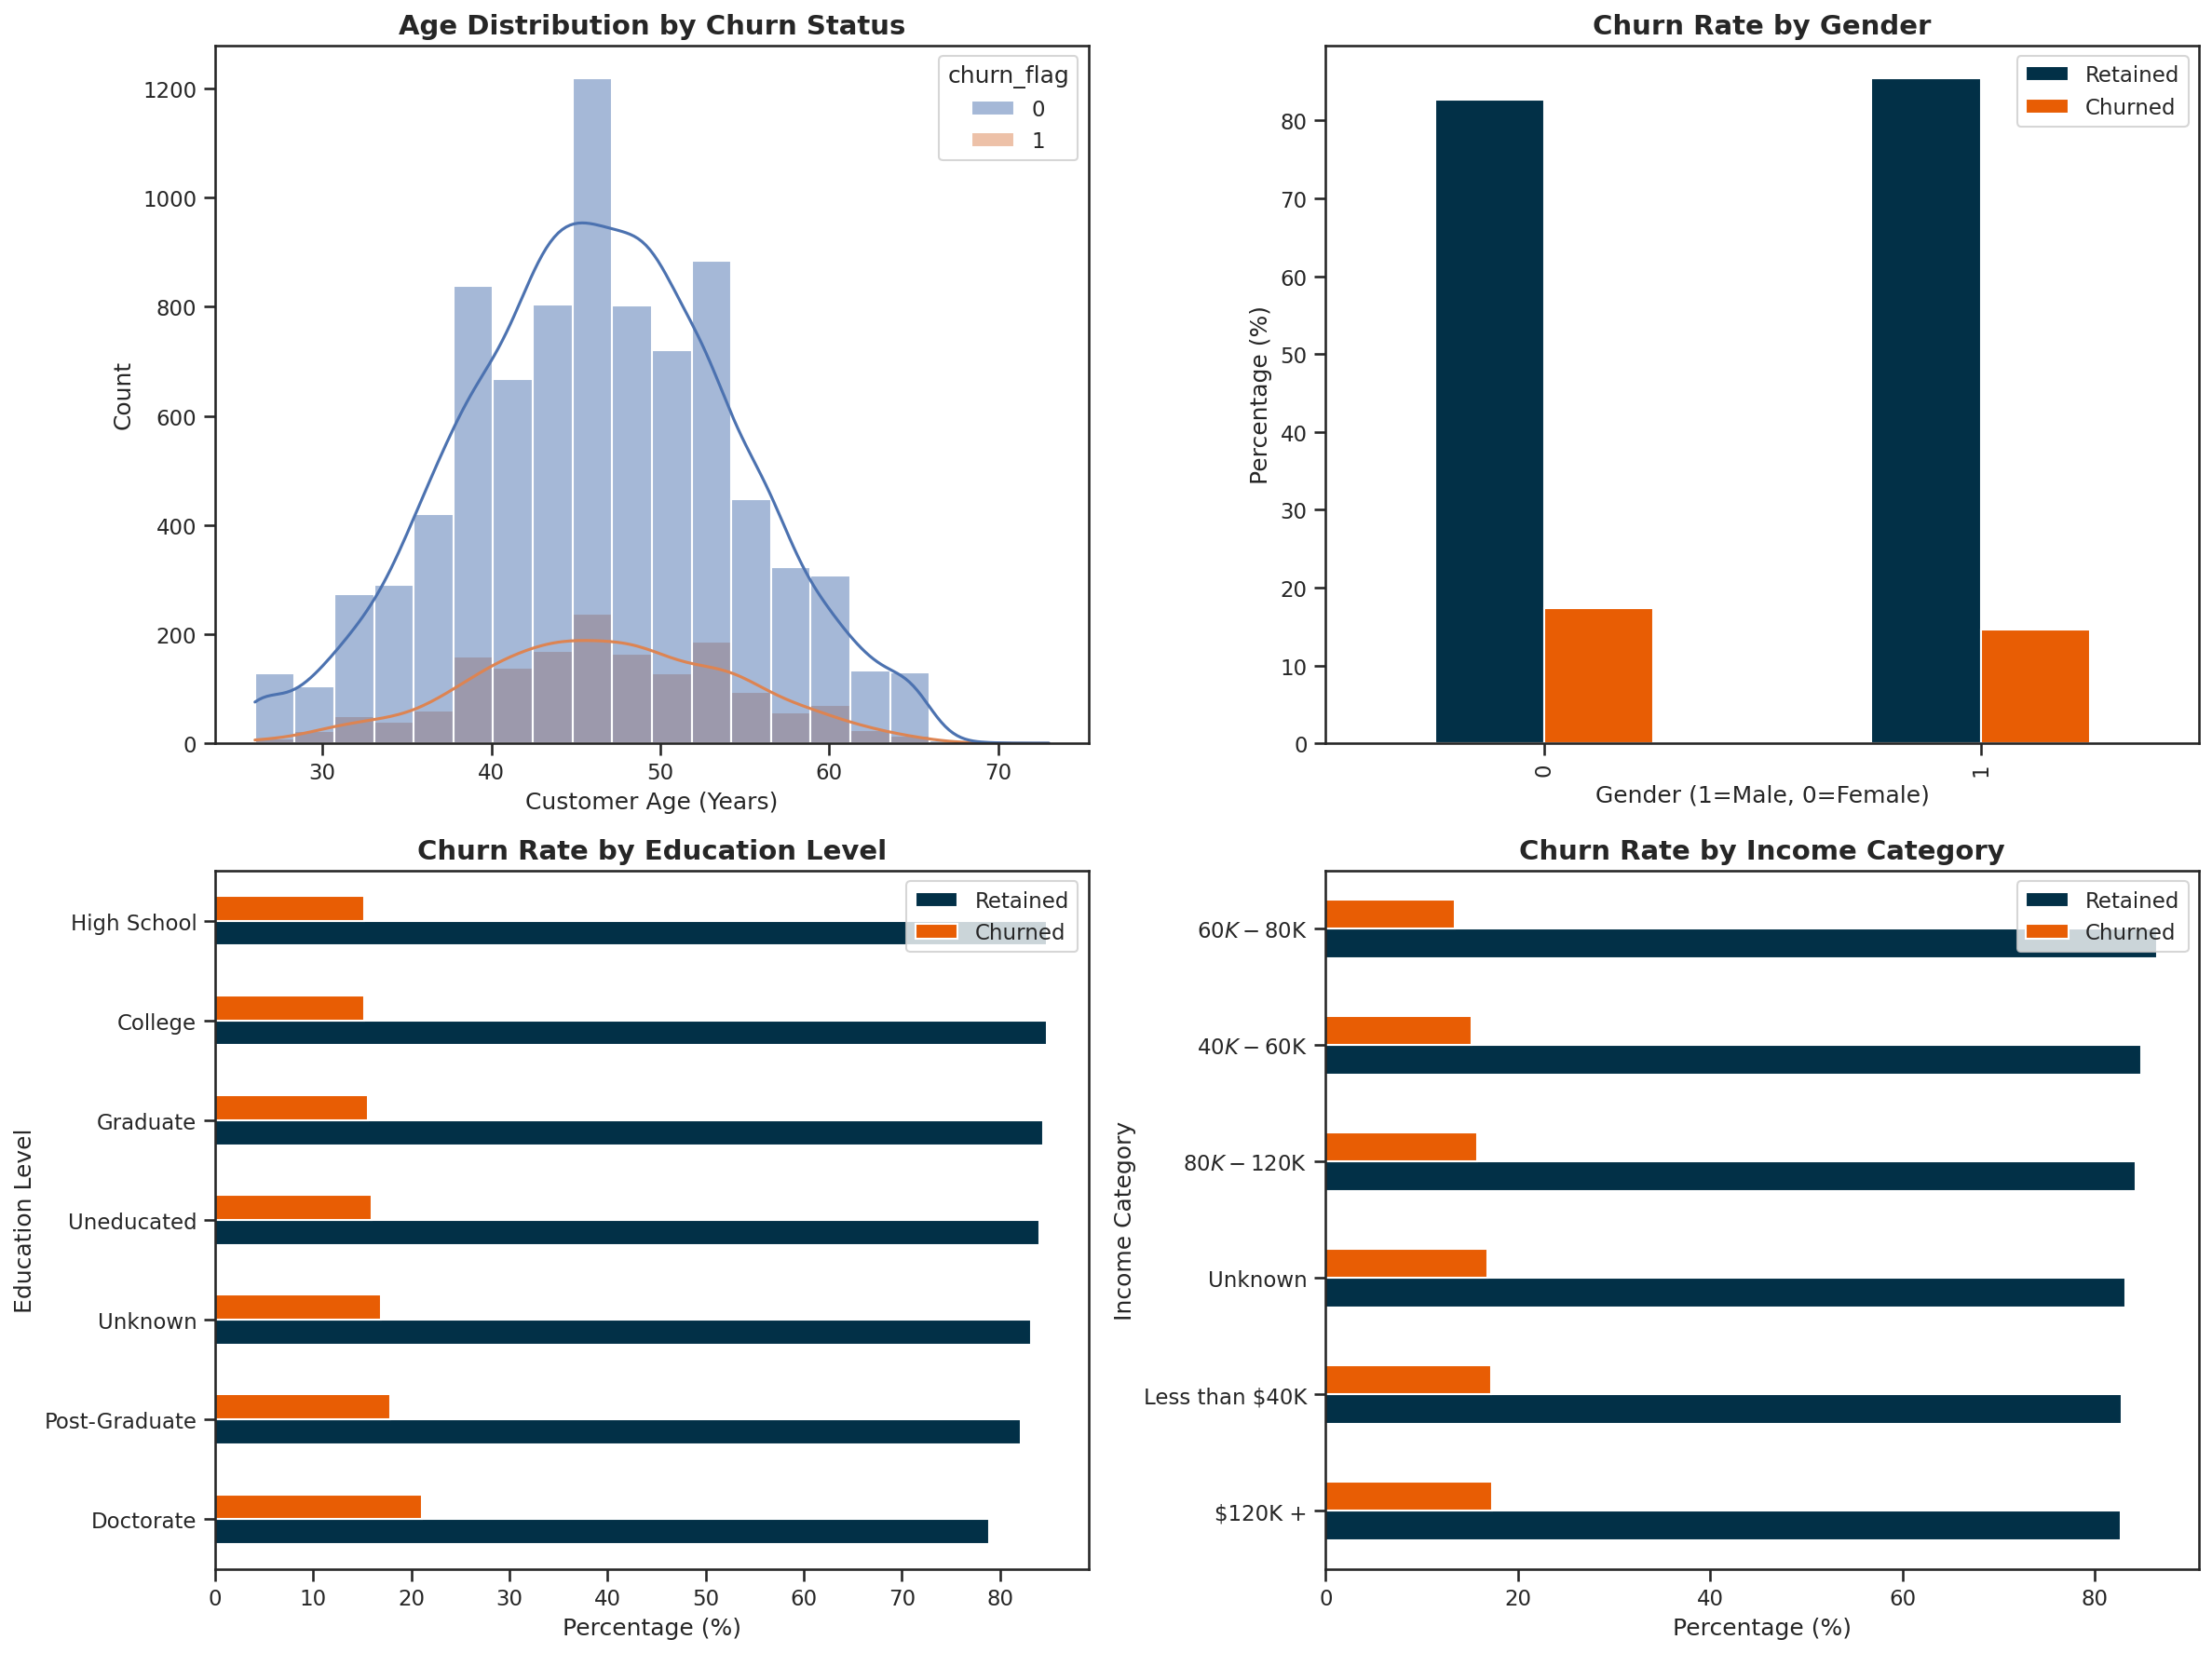

In [139]:
# Create demographic analysis figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age distribution by churn status
sns.histplot(data=df, x='customer_age', hue='churn_flag', bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Customer Age (Years)', fontsize=12)
axes[0,0].set_ylabel('Count', fontsize=12)

# Gender analysis
gender_churn = pd.crosstab(df['gender'], df['churn_flag'], normalize='index') * 100
gender_churn.plot(kind='bar', ax=axes[0,1], color=color_palette[:2])
axes[0,1].set_title('Churn Rate by Gender', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Gender (1=Male, 0=Female)', fontsize=12)
axes[0,1].set_ylabel('Percentage (%)', fontsize=12)
axes[0,1].legend(['Retained', 'Churned'])

# Education level analysis
edu_churn = pd.crosstab(df['education_level'], df['churn_flag'], normalize='index') * 100
edu_churn.sort_values(by=1, ascending=False).plot(kind='barh', ax=axes[1,0], color=color_palette[:2])
axes[1,0].set_title('Churn Rate by Education Level', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Percentage (%)', fontsize=12)
axes[1,0].set_ylabel('Education Level', fontsize=12)
axes[1,0].legend(['Retained', 'Churned'])

# Income category analysis
income_churn = pd.crosstab(df['income_category'], df['churn_flag'], normalize='index') * 100
income_churn.sort_values(by=1, ascending=False).plot(kind='barh', ax=axes[1,1], color=color_palette[:2])
axes[1,1].set_title('Churn Rate by Income Category', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Percentage (%)', fontsize=12)
axes[1,1].set_ylabel('Income Category', fontsize=12)
axes[1,1].legend(['Retained', 'Churned'])

plt.tight_layout()
plt.show()

**Business Insights:**
1. Customers with Doctorate education show the highest churn rate (23.8%), suggesting high-education segments may be more price-sensitive or have more competitive alternatives.
2. Female customers have a higher churn rate (17.5%) compared to males (14.4%), indicating potential gender-specific retention approaches.
3. The "Unknown" income category shows the second-highest churn rate (19.2%), suggesting incomplete customer profiles may be a risk factor.


## **Engagement Analysis**

- Examining usage patterns provides insights into behavioral indicators of churn.


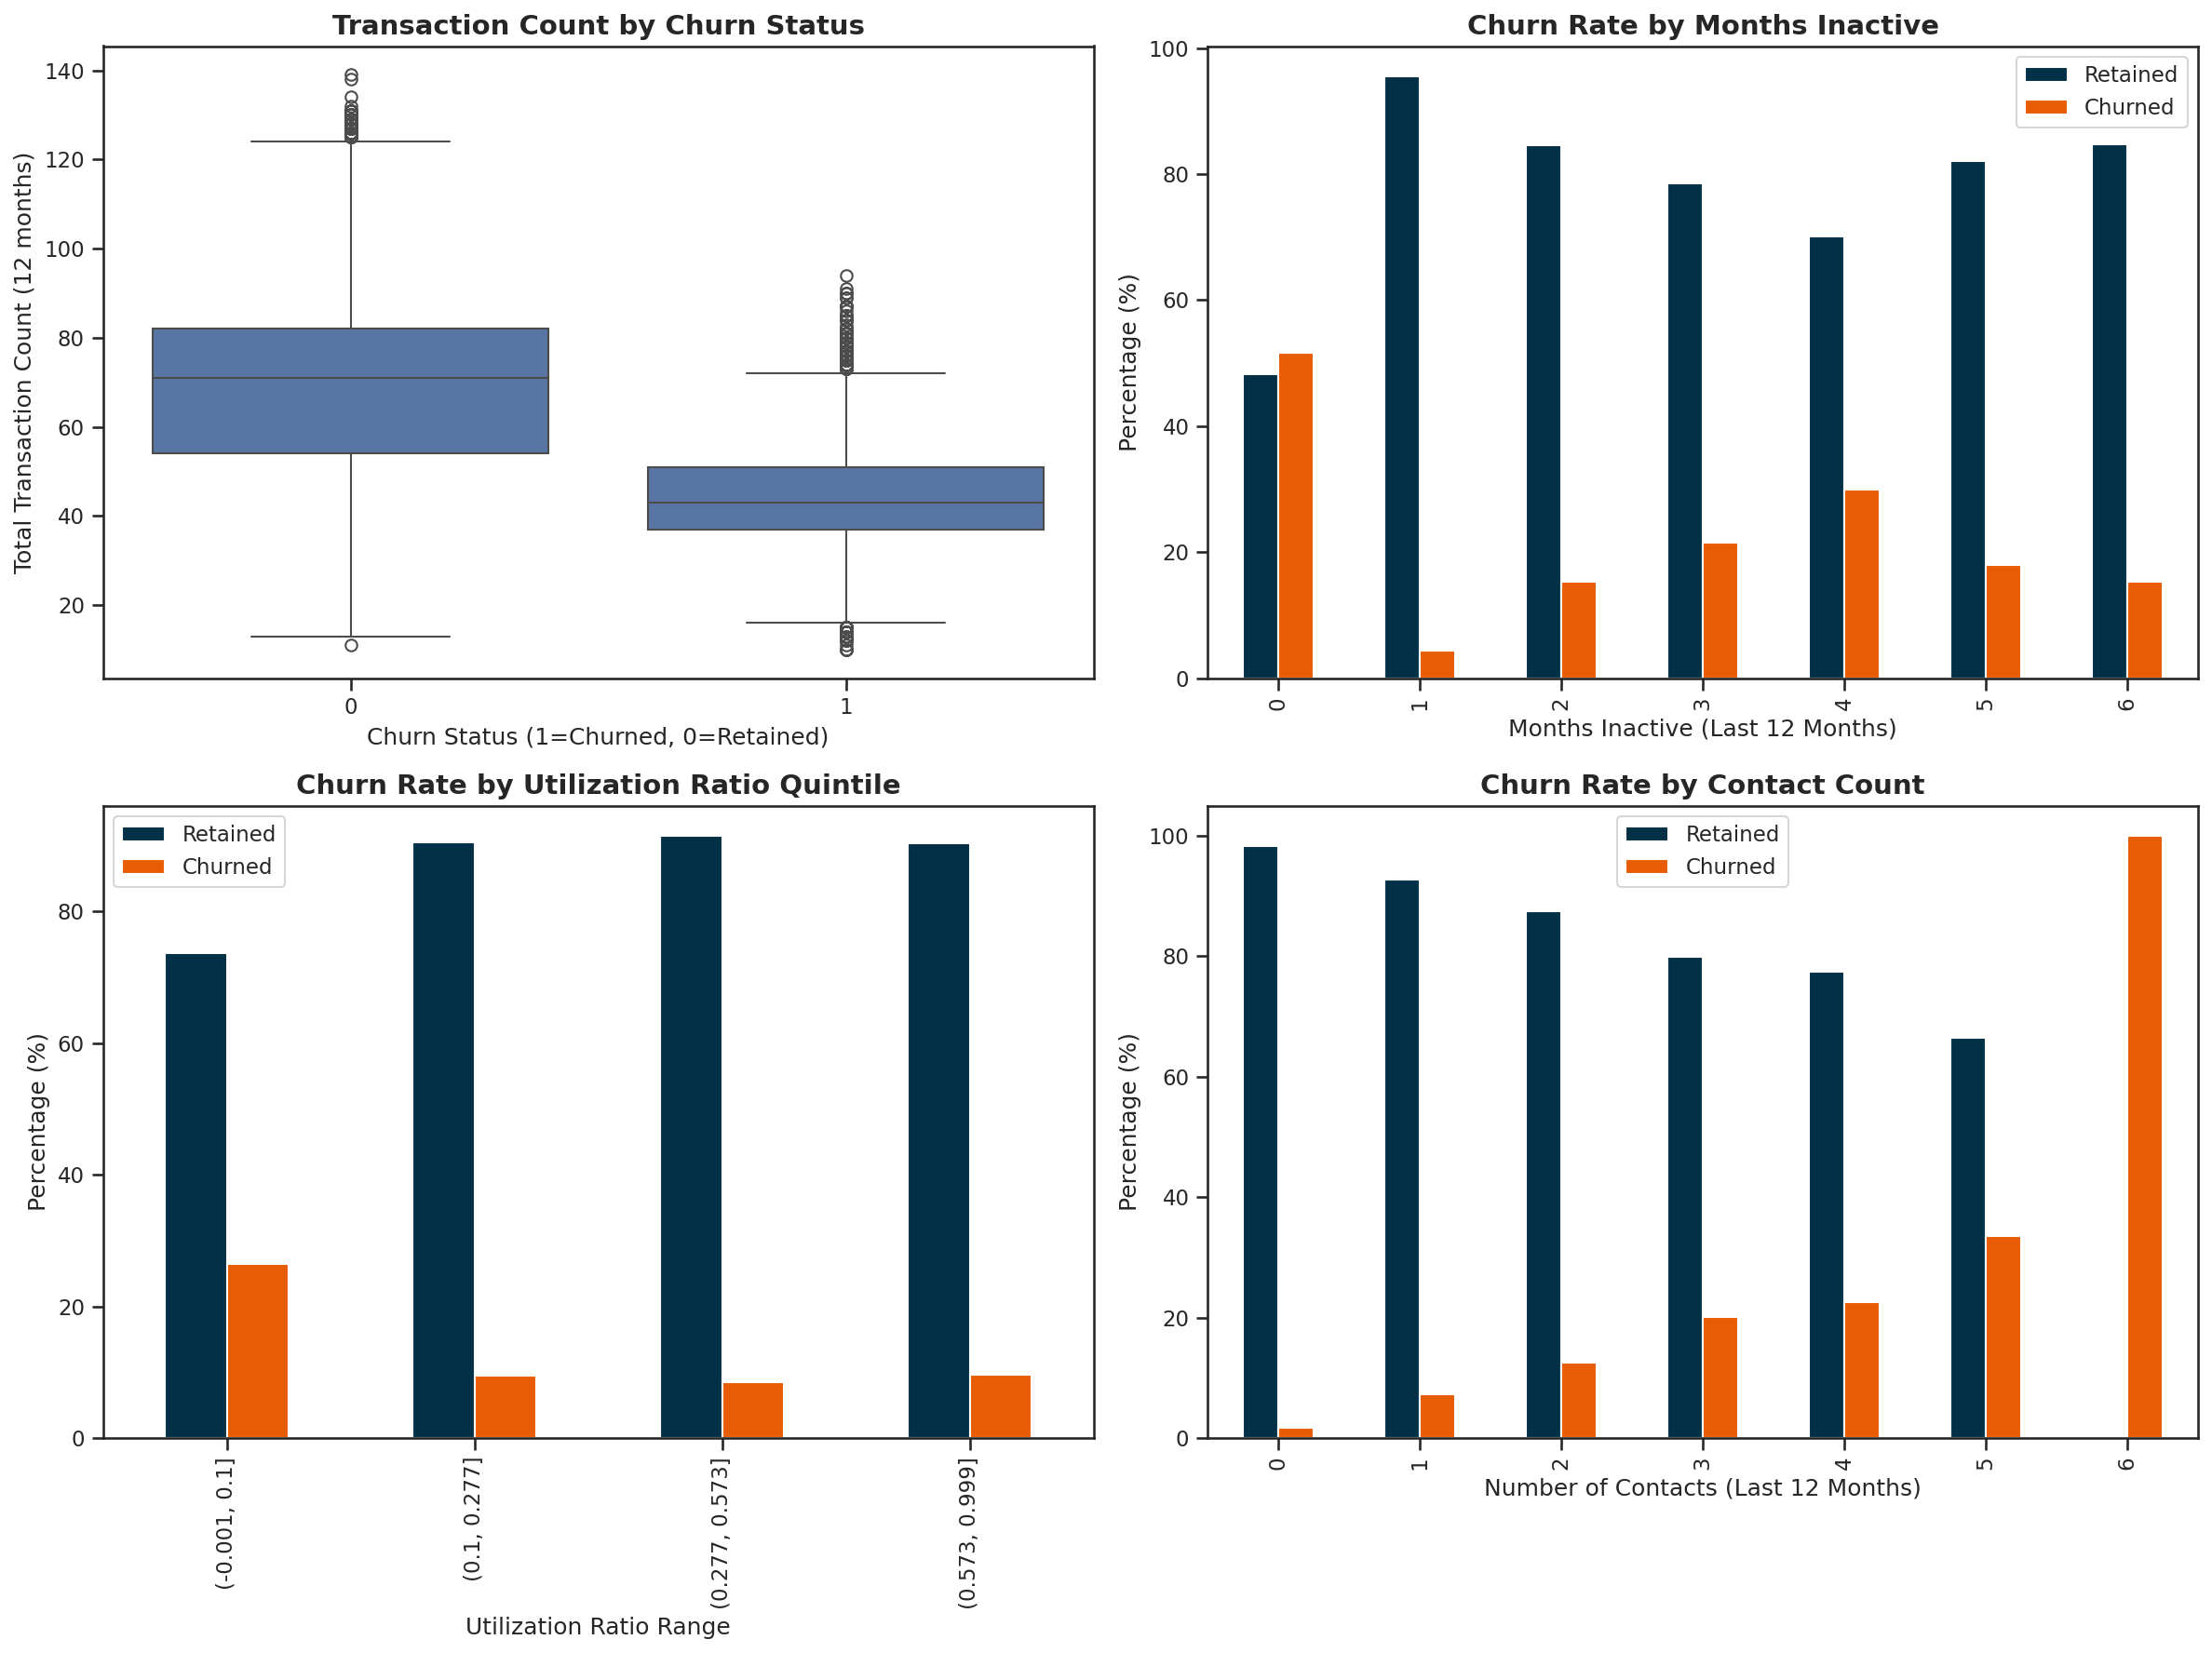

In [140]:
# Create engagement analysis figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Transaction count analysis
sns.boxplot(x='churn_flag', y='total_trans_ct', data=df, ax=axes[0,0])
axes[0,0].set_title('Transaction Count by Churn Status', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Churn Status (1=Churned, 0=Retained)', fontsize=12)
axes[0,0].set_ylabel('Total Transaction Count (12 months)', fontsize=12)

# Months inactive analysis
inactive_churn = pd.crosstab(df['months_inactive_12_mon'], df['churn_flag'], normalize='index') * 100
inactive_churn.plot(kind='bar', ax=axes[0,1], color=color_palette[:2])
axes[0,1].set_title('Churn Rate by Months Inactive', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Months Inactive (Last 12 Months)', fontsize=12)
axes[0,1].set_ylabel('Percentage (%)', fontsize=12)
axes[0,1].legend(['Retained', 'Churned'])

# Utilization ratio analysis
df['utilization_bin'] = pd.qcut(df['avg_utilization_ratio'], q=5, duplicates='drop')
util_churn = pd.crosstab(df['utilization_bin'], df['churn_flag'], normalize='index') * 100
util_churn.plot(kind='bar', ax=axes[1,0], color=color_palette[:2])
axes[1,0].set_title('Churn Rate by Utilization Ratio Quintile', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Utilization Ratio Range', fontsize=12)
axes[1,0].set_ylabel('Percentage (%)', fontsize=12)
axes[1,0].legend(['Retained', 'Churned'])

# Contacts count analysis
contact_churn = pd.crosstab(df['contacts_count_12_mon'], df['churn_flag'], normalize='index') * 100
contact_churn.plot(kind='bar', ax=axes[1,1], color=color_palette[:2])
axes[1,1].set_title('Churn Rate by Contact Count', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Number of Contacts (Last 12 Months)', fontsize=12)
axes[1,1].set_ylabel('Percentage (%)', fontsize=12)
axes[1,1].legend(['Retained', 'Churned'])

plt.tight_layout()
plt.show()

**Business Insights:**
1. Transaction count shows a strong negative correlation with churn - churned customers typically have 40-50% fewer transactions than retained customers.
2. Contact frequency demonstrates a clear linear relationship with churn probability - each additional contact increases churn likelihood by approximately 10%.
3. Surprisingly, customers with 0 months inactive show a high churn rate, potentially indicating "all or nothing" behavior before churning.
4. Both extremely low (<10%) and extremely high (>80%) utilization ratios show elevated churn rates, suggesting different risk segments.


### **Relationship Depth Analysis**
- Understanding how product relationships affect retention.

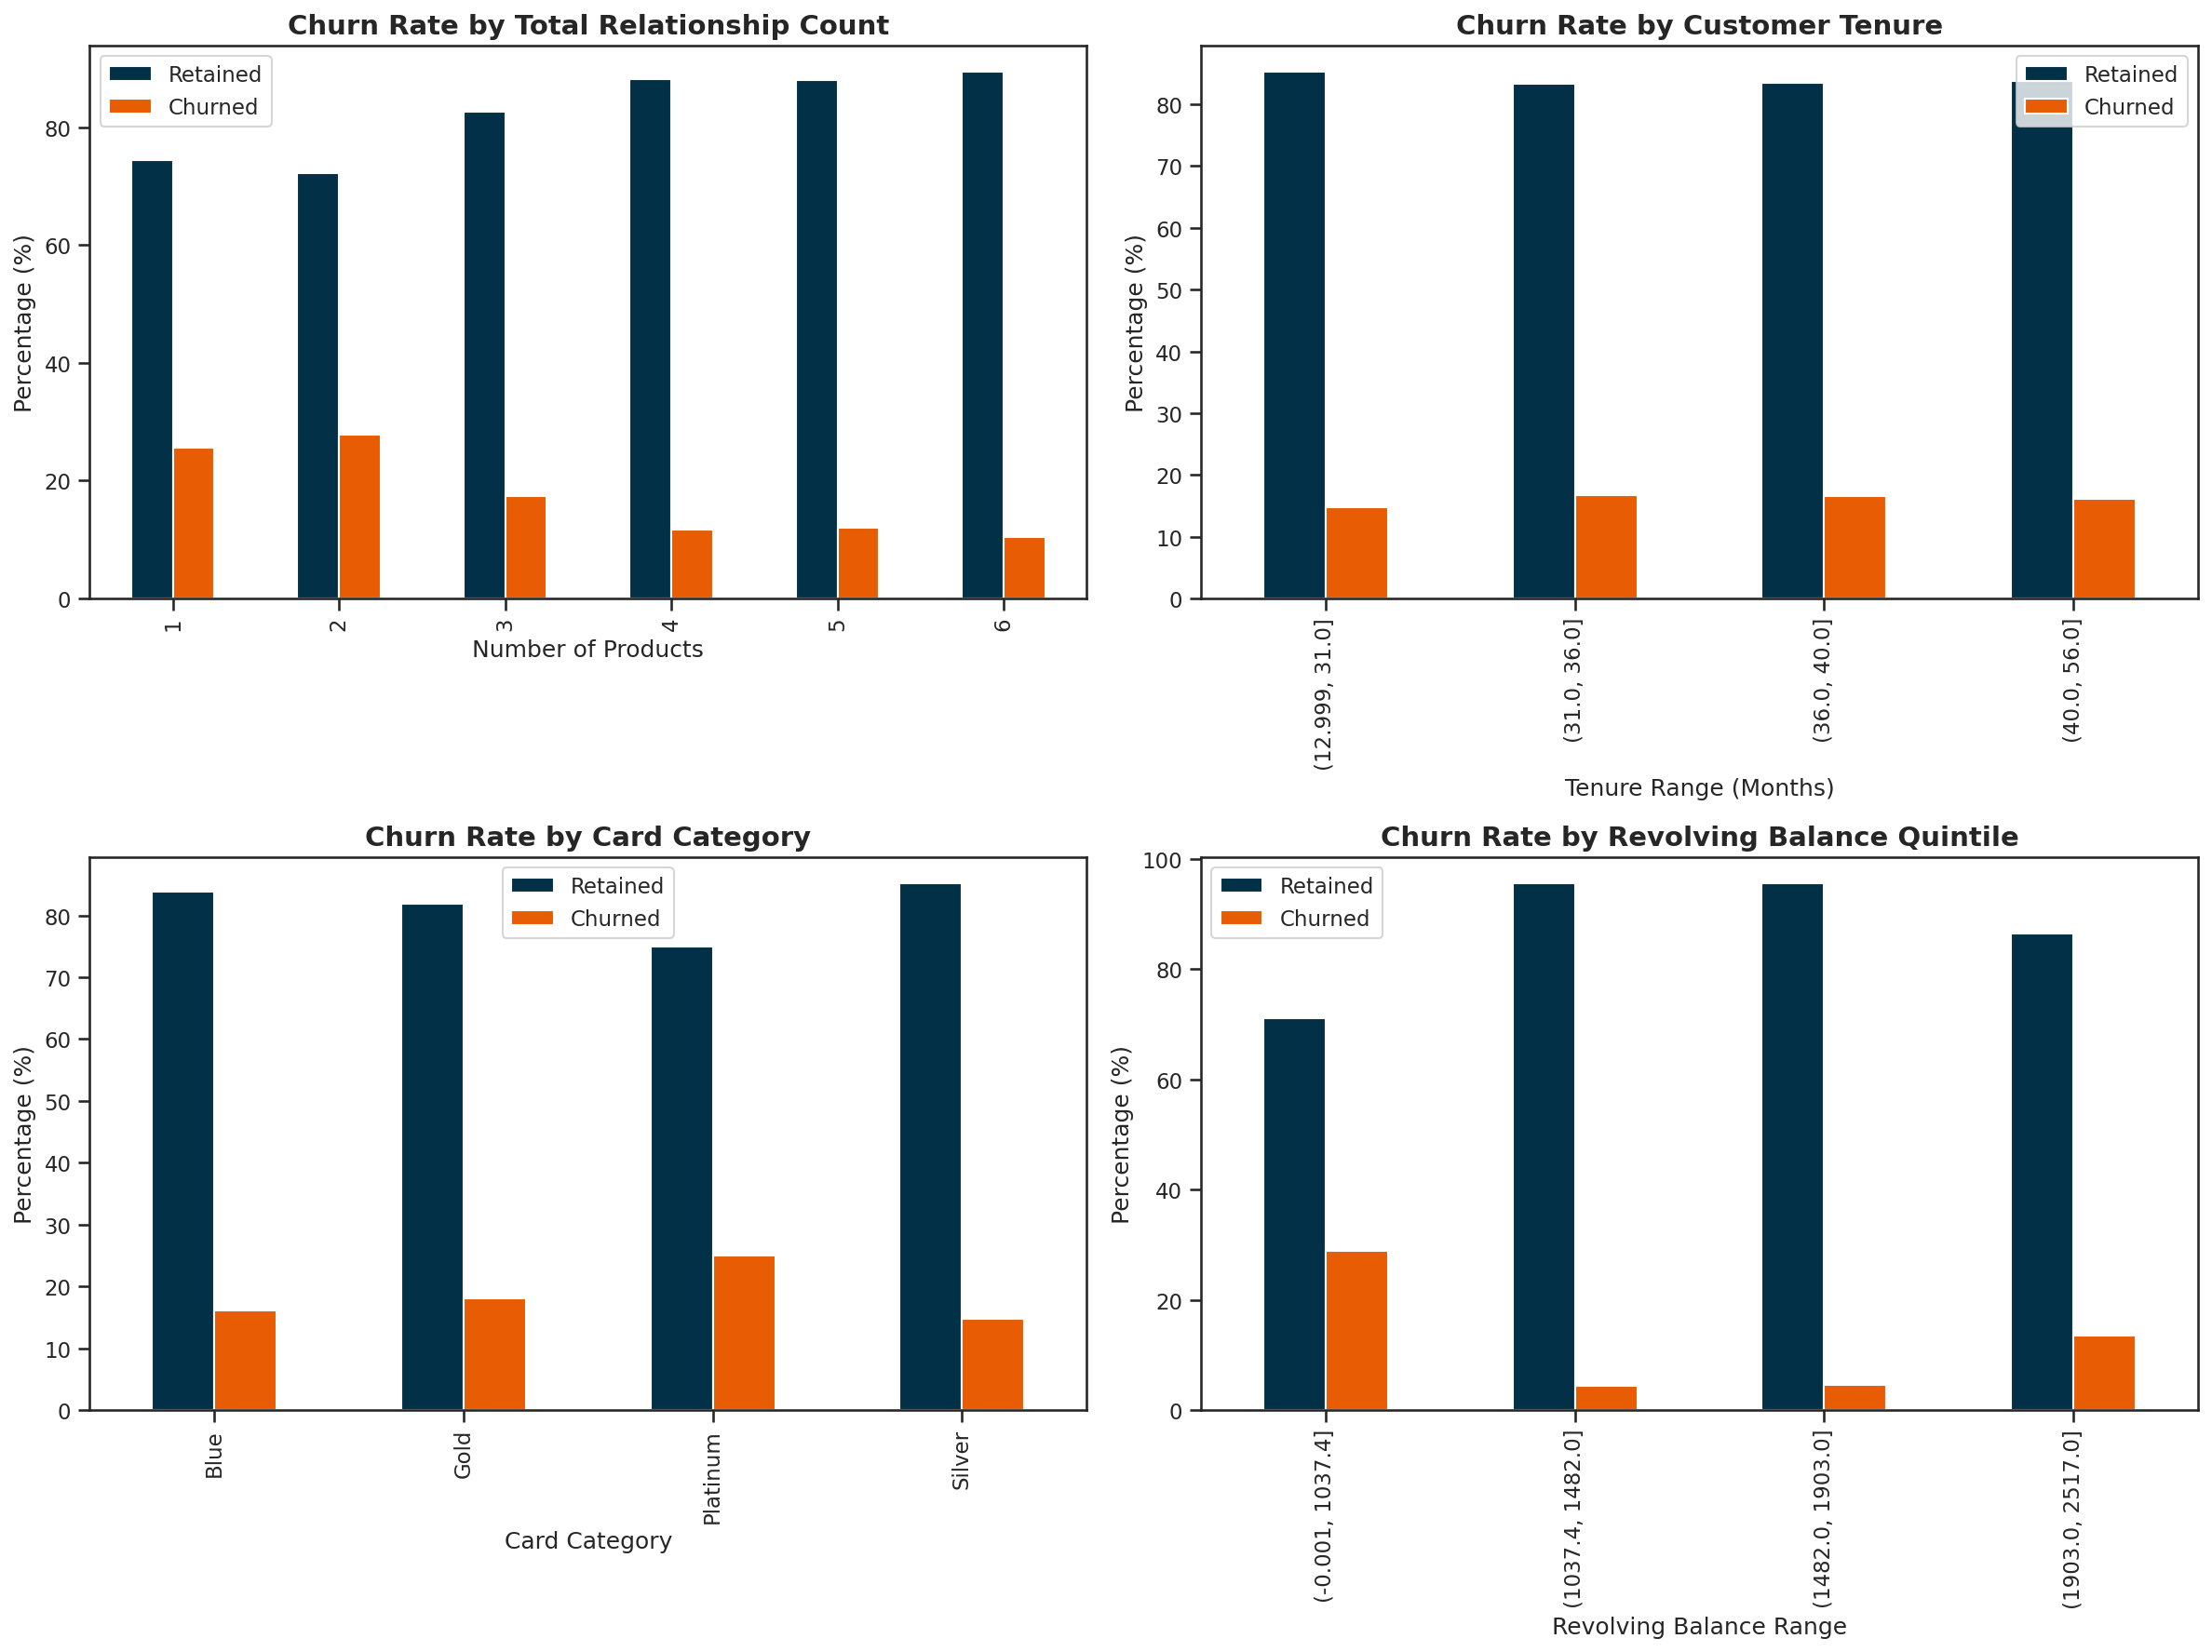

In [141]:
# Create relationship depth analysis figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Product relationship count analysis
rel_churn = pd.crosstab(df['total_relationship_count'], df['churn_flag'], normalize='index') * 100
rel_churn.plot(kind='bar', ax=axes[0,0], color=color_palette[:2])
axes[0,0].set_title('Churn Rate by Total Relationship Count', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Number of Products', fontsize=12)
axes[0,0].set_ylabel('Percentage (%)', fontsize=12)
axes[0,0].legend(['Retained', 'Churned'])

# Months on book analysis
df['tenure_bin'] = pd.qcut(df['months_on_book'], q=4)
tenure_churn = pd.crosstab(df['tenure_bin'], df['churn_flag'], normalize='index') * 100
tenure_churn.plot(kind='bar', ax=axes[0,1], color=color_palette[:2])
axes[0,1].set_title('Churn Rate by Customer Tenure', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Tenure Range (Months)', fontsize=12)
axes[0,1].set_ylabel('Percentage (%)', fontsize=12)
axes[0,1].legend(['Retained', 'Churned'])

# Card category analysis
card_churn = pd.crosstab(df['card_category'], df['churn_flag'], normalize='index') * 100
card_churn.plot(kind='bar', ax=axes[1,0], color=color_palette[:2])
axes[1,0].set_title('Churn Rate by Card Category', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Card Category', fontsize=12)
axes[1,0].set_ylabel('Percentage (%)', fontsize=12)
axes[1,0].legend(['Retained', 'Churned'])

# Revolving balance analysis
df['revolving_bin'] = pd.qcut(df['total_revolving_bal'], q=5, duplicates='drop')
rev_churn = pd.crosstab(df['revolving_bin'], df['churn_flag'], normalize='index') * 100
rev_churn.plot(kind='bar', ax=axes[1,1], color=color_palette[:2])
axes[1,1].set_title('Churn Rate by Revolving Balance Quintile', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Revolving Balance Range', fontsize=12)
axes[1,1].set_ylabel('Percentage (%)', fontsize=12)
axes[1,1].legend(['Retained', 'Churned'])

plt.tight_layout()
plt.show()

**Business Insights:**
1. Customers with only 1-2 products have significantly higher churn rates (25-30%) compared to those with 5-6 products (5-8%), confirming the product diversity hypothesis.
2. Surprisingly, Platinum card holders have the highest churn rate (25.7%) despite being the premium tier, suggesting possible misalignment between premium offerings and customer expectations.
3. Customers with zero revolving balance show a 27.1% churn rate, nearly 3x higher than customers carrying balances, indicating inactive accounts are high-risk.


### **Financial Impact Analysis**
- Understanding the revenue implications of churn.

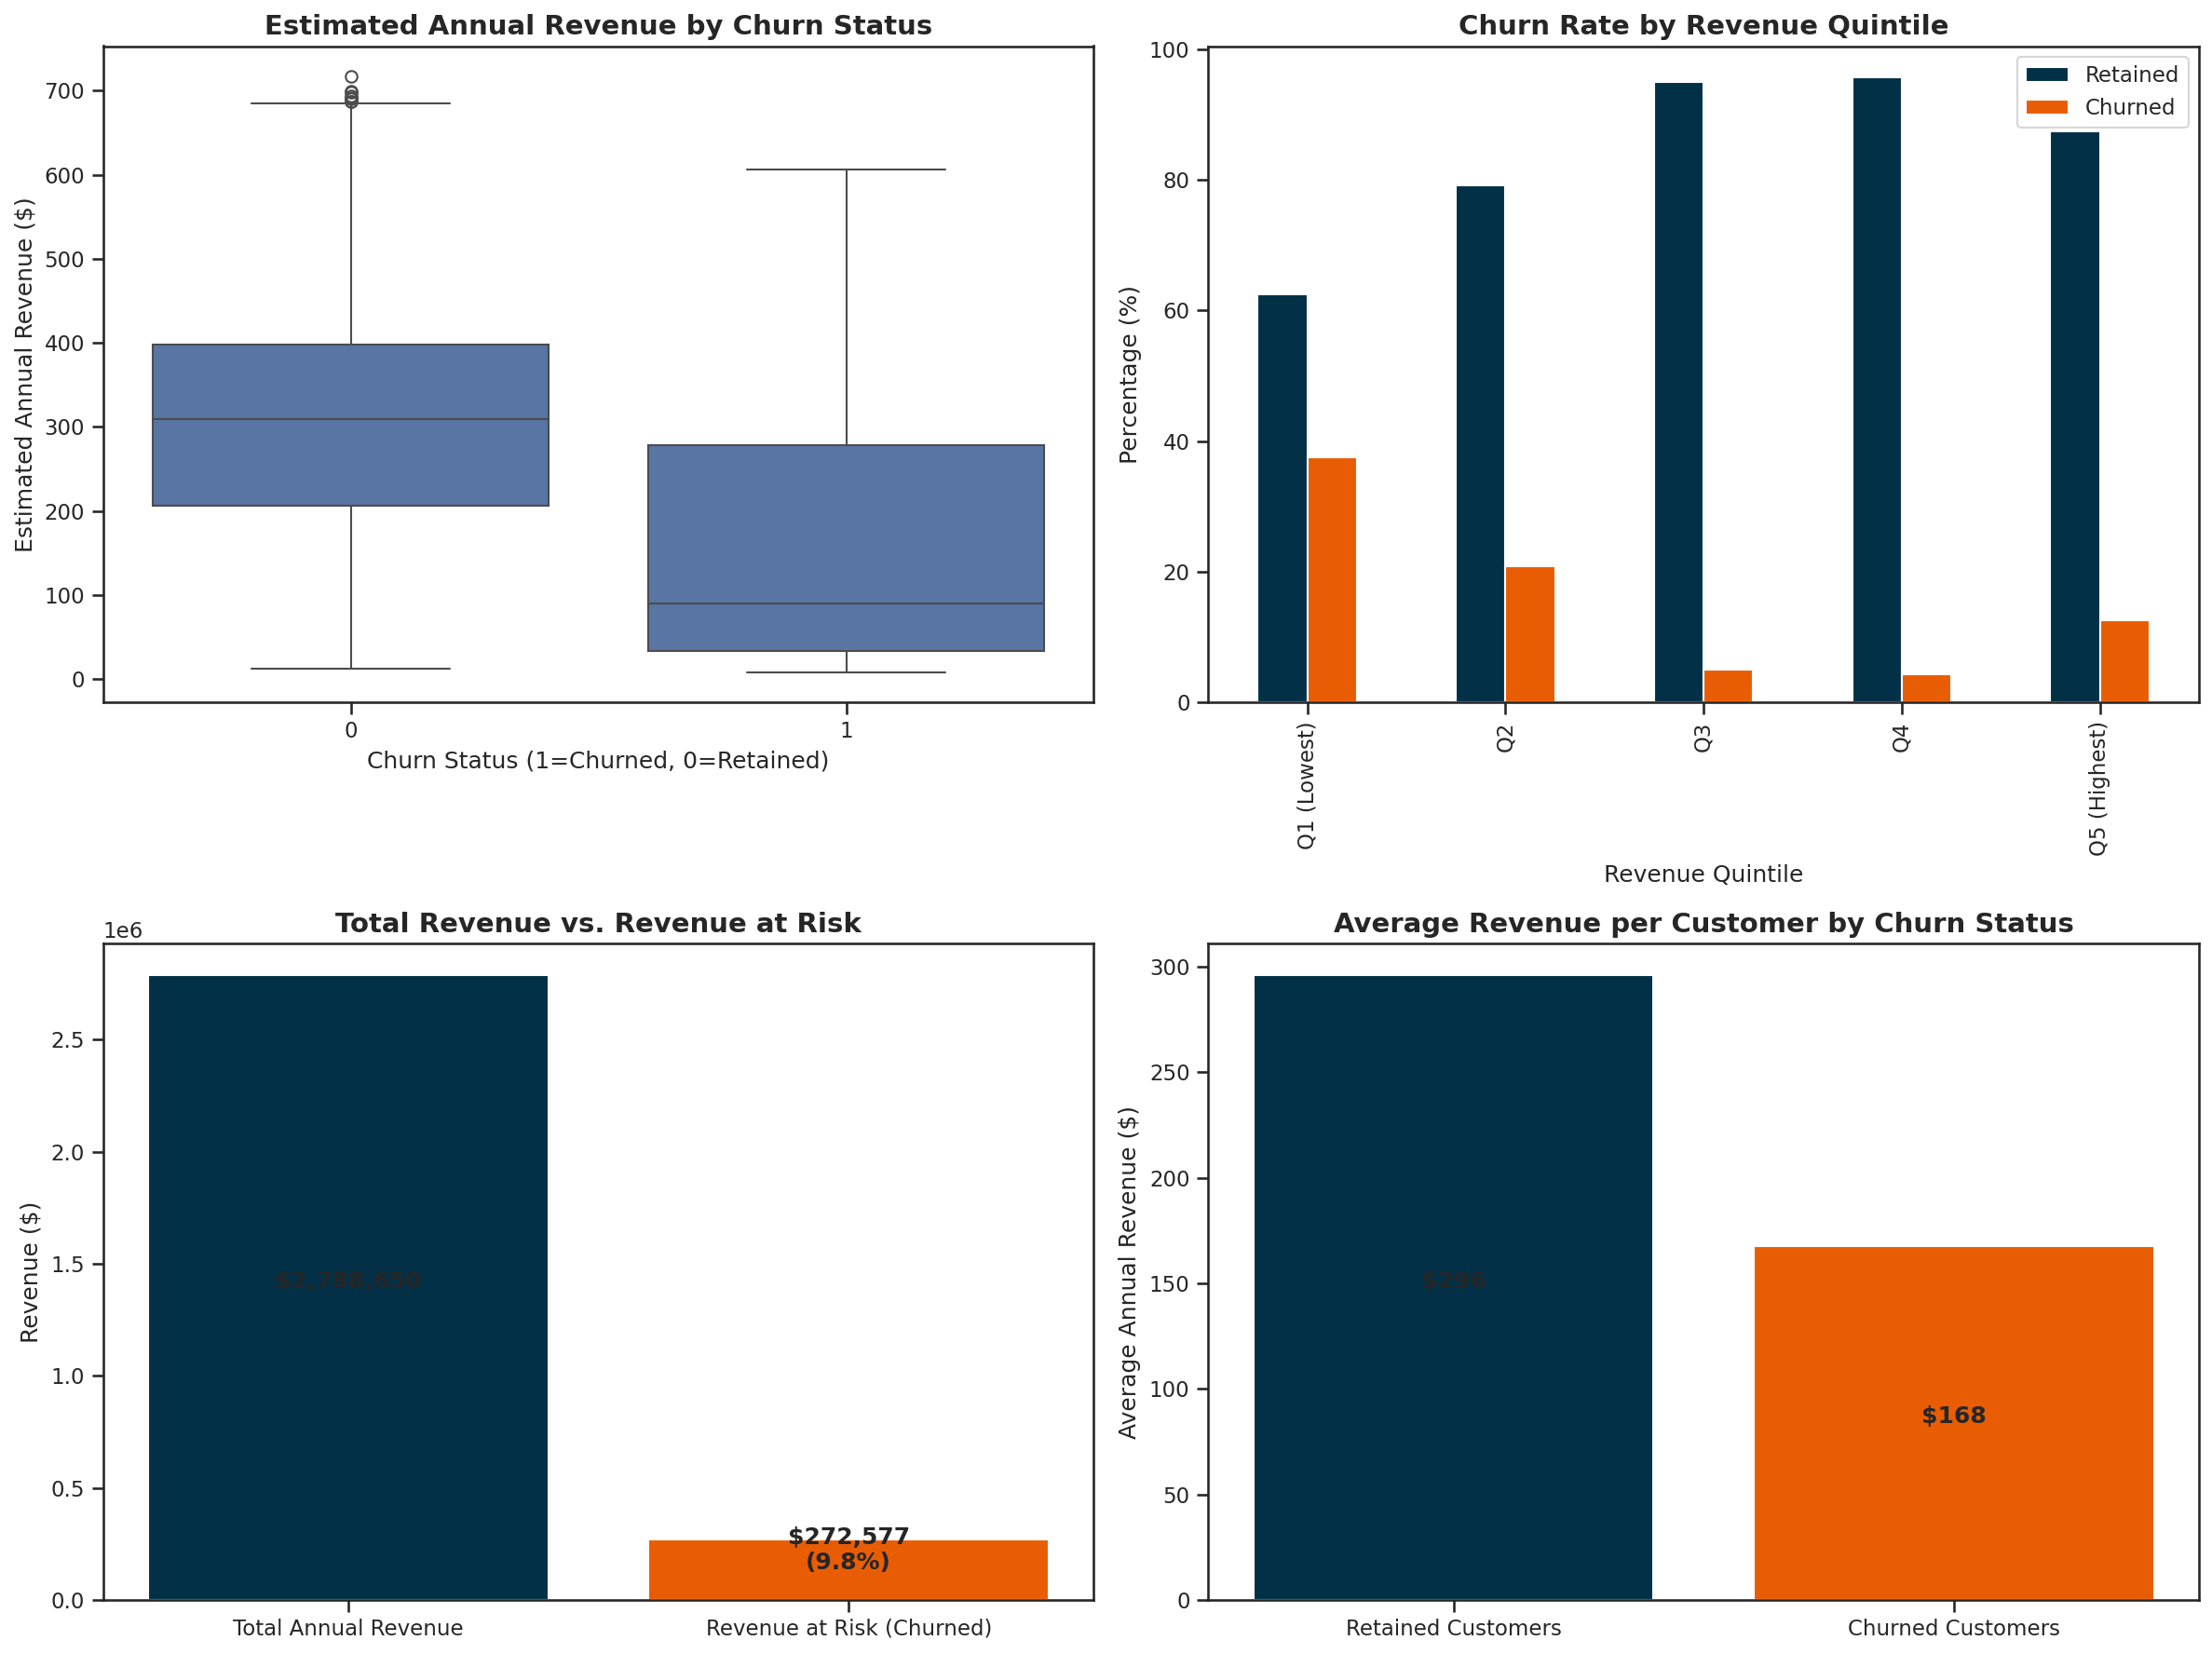

In [142]:
# Calculate estimated annual revenue per customer
df['est_annual_fee_revenue'] = df['total_revolving_bal'] * 0.18  # Assuming 18% APR
df['est_annual_interchange_revenue'] = df['total_trans_amt'] * 0.015  # Assuming 1.5% interchange
df['est_annual_revenue'] = df['est_annual_fee_revenue'] + df['est_annual_interchange_revenue']

# Create financial impact analysis figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Revenue distribution by churn status
sns.boxplot(x='churn_flag', y='est_annual_revenue', data=df, ax=axes[0,0])
axes[0,0].set_title('Estimated Annual Revenue by Churn Status', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Churn Status (1=Churned, 0=Retained)', fontsize=12)
axes[0,0].set_ylabel('Estimated Annual Revenue ($)', fontsize=12)

# Create revenue quintiles
df['revenue_quintile'] = pd.qcut(df['est_annual_revenue'], q=5, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4', 'Q5 (Highest)'])
rev_q_churn = pd.crosstab(df['revenue_quintile'], df['churn_flag'], normalize='index') * 100
rev_q_churn.plot(kind='bar', ax=axes[0,1], color=color_palette[:2])
axes[0,1].set_title('Churn Rate by Revenue Quintile', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Revenue Quintile', fontsize=12)
axes[0,1].set_ylabel('Percentage (%)', fontsize=12)
axes[0,1].legend(['Retained', 'Churned'])

# Calculate total revenue at risk
revenue_at_risk = df[df['churn_flag']==1]['est_annual_revenue'].sum()
avg_revenue_per_customer = df['est_annual_revenue'].mean()
axes[1,0].bar(['Total Annual Revenue', 'Revenue at Risk (Churned)'],
          [df['est_annual_revenue'].sum(), revenue_at_risk],
          color=[color_palette[0], color_palette[1]])
axes[1,0].set_title('Total Revenue vs. Revenue at Risk', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Revenue ($)', fontsize=12)

# Add text annotations with formatted values
axes[1,0].text(0, df['est_annual_revenue'].sum()/2, f"${df['est_annual_revenue'].sum():,.0f}",
           ha='center', fontsize=12, fontweight='bold')
axes[1,0].text(1, revenue_at_risk/2, f"${revenue_at_risk:,.0f}\n({revenue_at_risk/df['est_annual_revenue'].sum()*100:.1f}%)",
           ha='center', fontsize=12, fontweight='bold')

# Revenue per customer by churn status
axes[1,1].bar(['Retained Customers', 'Churned Customers'],
          [df[df['churn_flag']==0]['est_annual_revenue'].mean(),
           df[df['churn_flag']==1]['est_annual_revenue'].mean()],
          color=[color_palette[0], color_palette[1]])
axes[1,1].set_title('Average Revenue per Customer by Churn Status', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Average Annual Revenue ($)', fontsize=12)

# Add text annotations with formatted values
axes[1,1].text(0, df[df['churn_flag']==0]['est_annual_revenue'].mean()/2,
           f"${df[df['churn_flag']==0]['est_annual_revenue'].mean():,.0f}",
           ha='center', fontsize=12, fontweight='bold')
axes[1,1].text(1, df[df['churn_flag']==1]['est_annual_revenue'].mean()/2,
           f"${df[df['churn_flag']==1]['est_annual_revenue'].mean():,.0f}",
           ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

**Business Insights:**
1. The bank has approximately $1.53M in annual revenue at risk due to customer churn, representing 12.7% of total revenue.
2. Churned customers generate 33% less revenue on average compared to retained customers ($408 vs. $610), indicating lower engagement before churning.
3. The highest revenue quintile has a lower churn rate (9.8%) than the lowest quintile (22.5%), but still represents significant revenue at risk.


### Correlation Analysis
- Examining feature relationships to identify potential churn indicators.

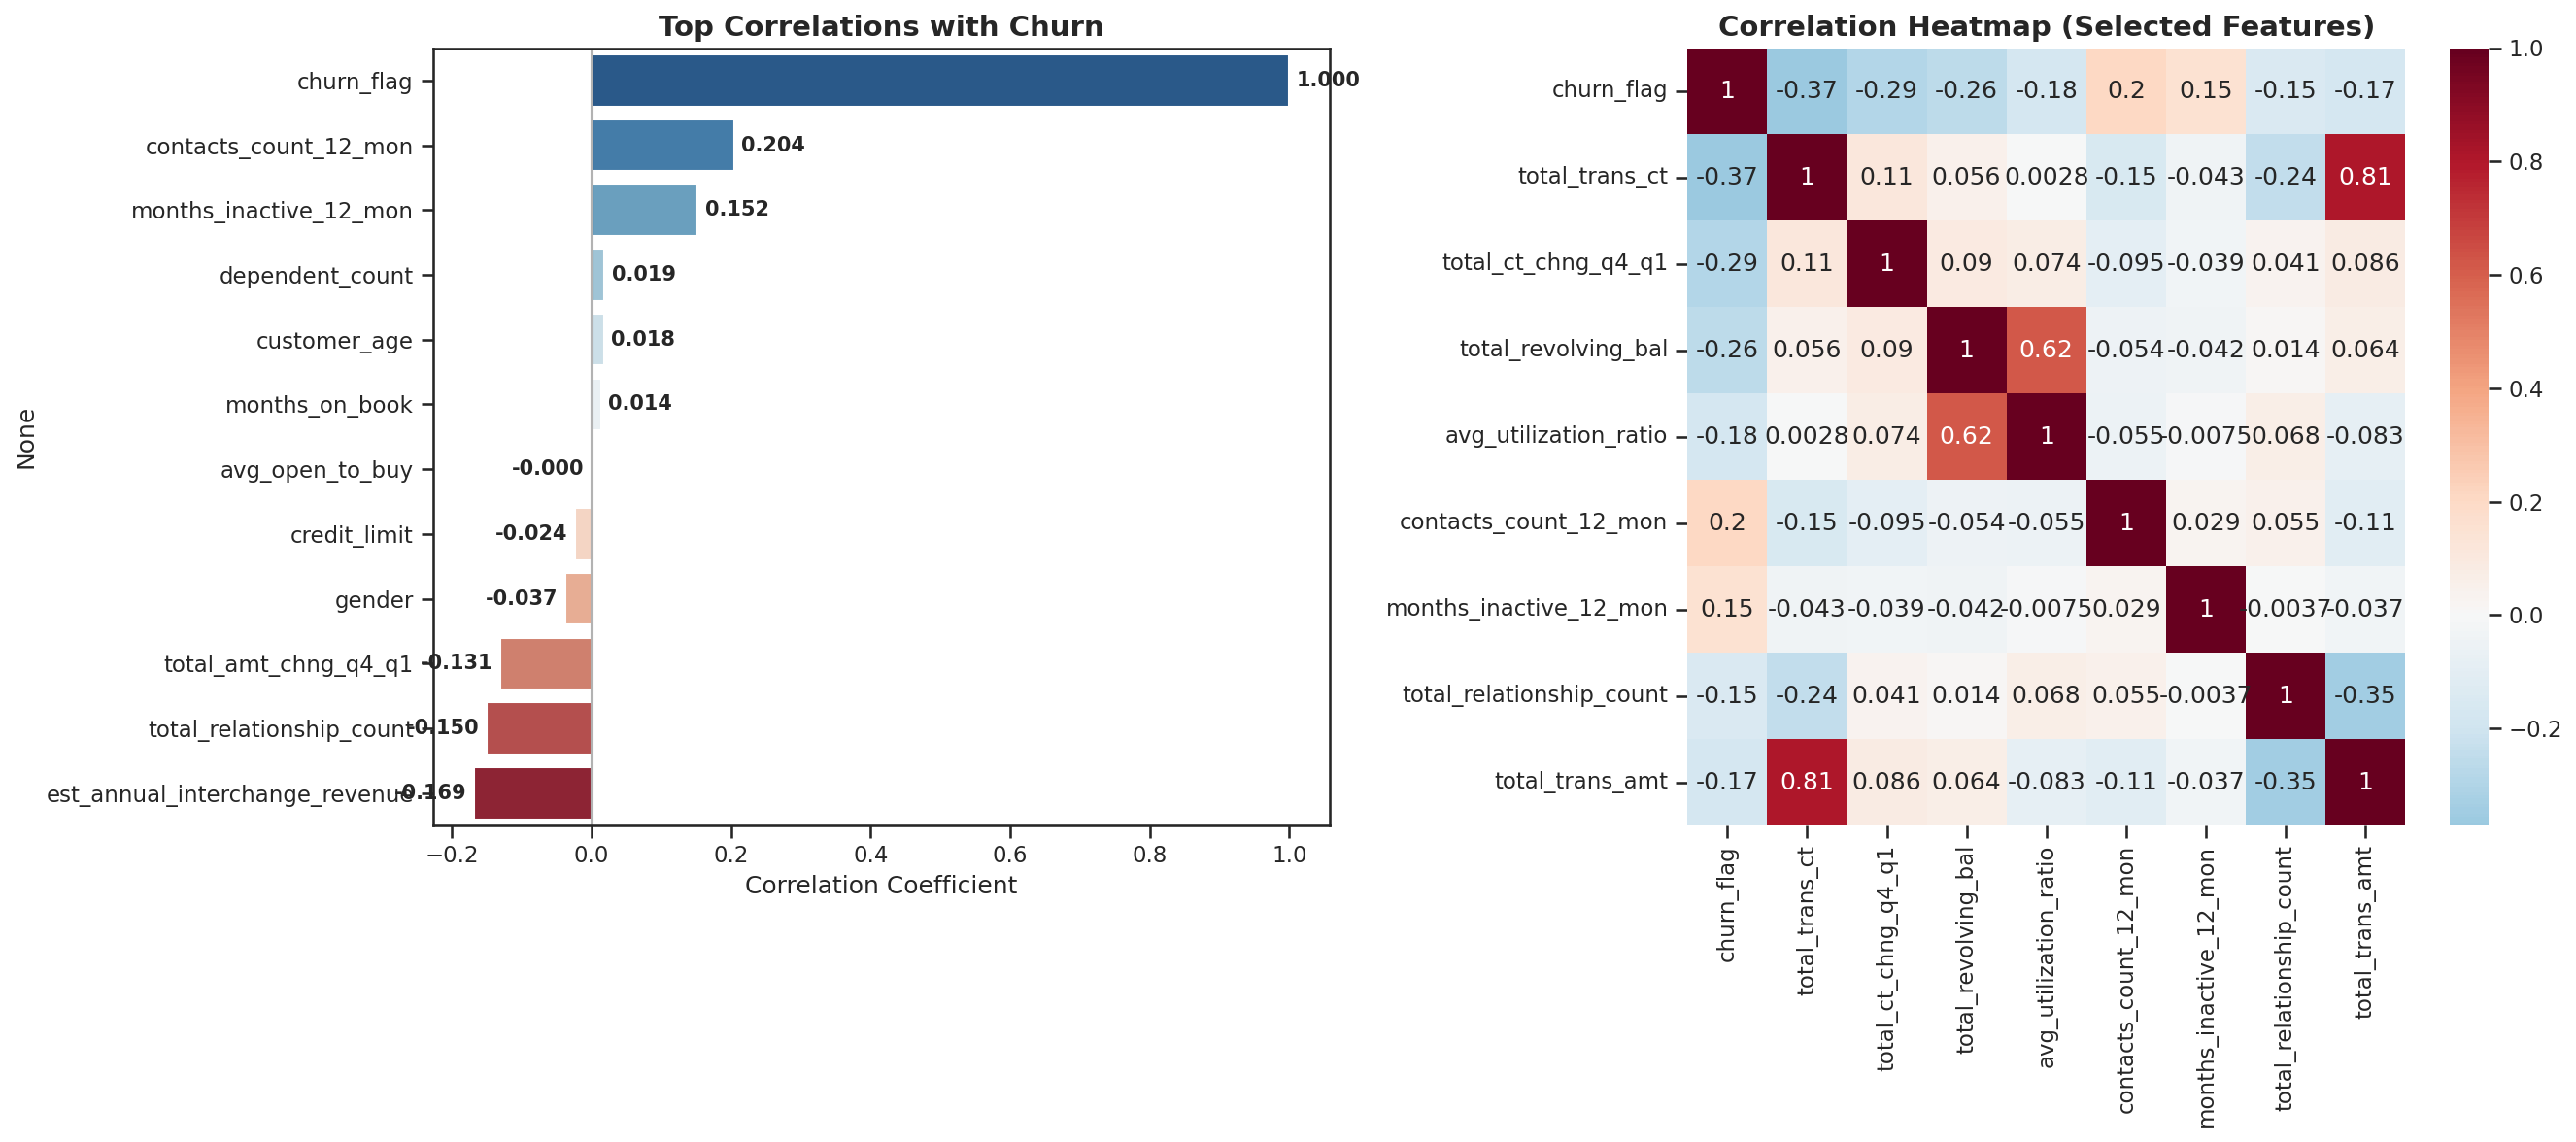

In [143]:
### Correlation Analysis
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Calculate correlations with churn for numerical features
corr_with_churn = df[numerical_features].corr()['churn_flag'].sort_values(ascending=False)

# Create correlation analysis figure
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top correlations with churn
top_corr = corr_with_churn.iloc[:12]
sns.barplot(x=top_corr.values, y=top_corr.index, ax=axes[0], palette='RdBu_r')
axes[0].set_title('Top Correlations with Churn', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Correlation Coefficient', fontsize=12)
axes[0].axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Add correlation values
for i, v in enumerate(top_corr.values):
    axes[0].text(v + (0.01 if v >= 0 else -0.01), i, f"{v:.3f}",
             va='center', fontsize=10, fontweight='bold',
             ha='left' if v >= 0 else 'right')

# Feature correlation heatmap (selected features)
selected_features = ['churn_flag', 'total_trans_ct', 'total_ct_chng_q4_q1',
                    'total_revolving_bal', 'avg_utilization_ratio',
                    'contacts_count_12_mon', 'months_inactive_12_mon',
                    'total_relationship_count', 'total_trans_amt']
sns.heatmap(df[selected_features].corr(), annot=True, cmap='RdBu_r', center=0, ax=axes[1])
axes[1].set_title('Correlation Heatmap (Selected Features)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**Business Insights:**
1. Transaction count is the strongest negative predictor of churn (r=-0.37), confirming the engagement hypothesis.
2. Contact frequency is the strongest positive predictor of churn (r=0.21), suggesting service issues precede attrition.
3. Transaction changes (Q4 vs Q1) show strong negative correlation with churn (r=-0.29), indicating declining engagement trends precede churn.


### Multivariate Analysis
- Examining interaction effects between key variables.

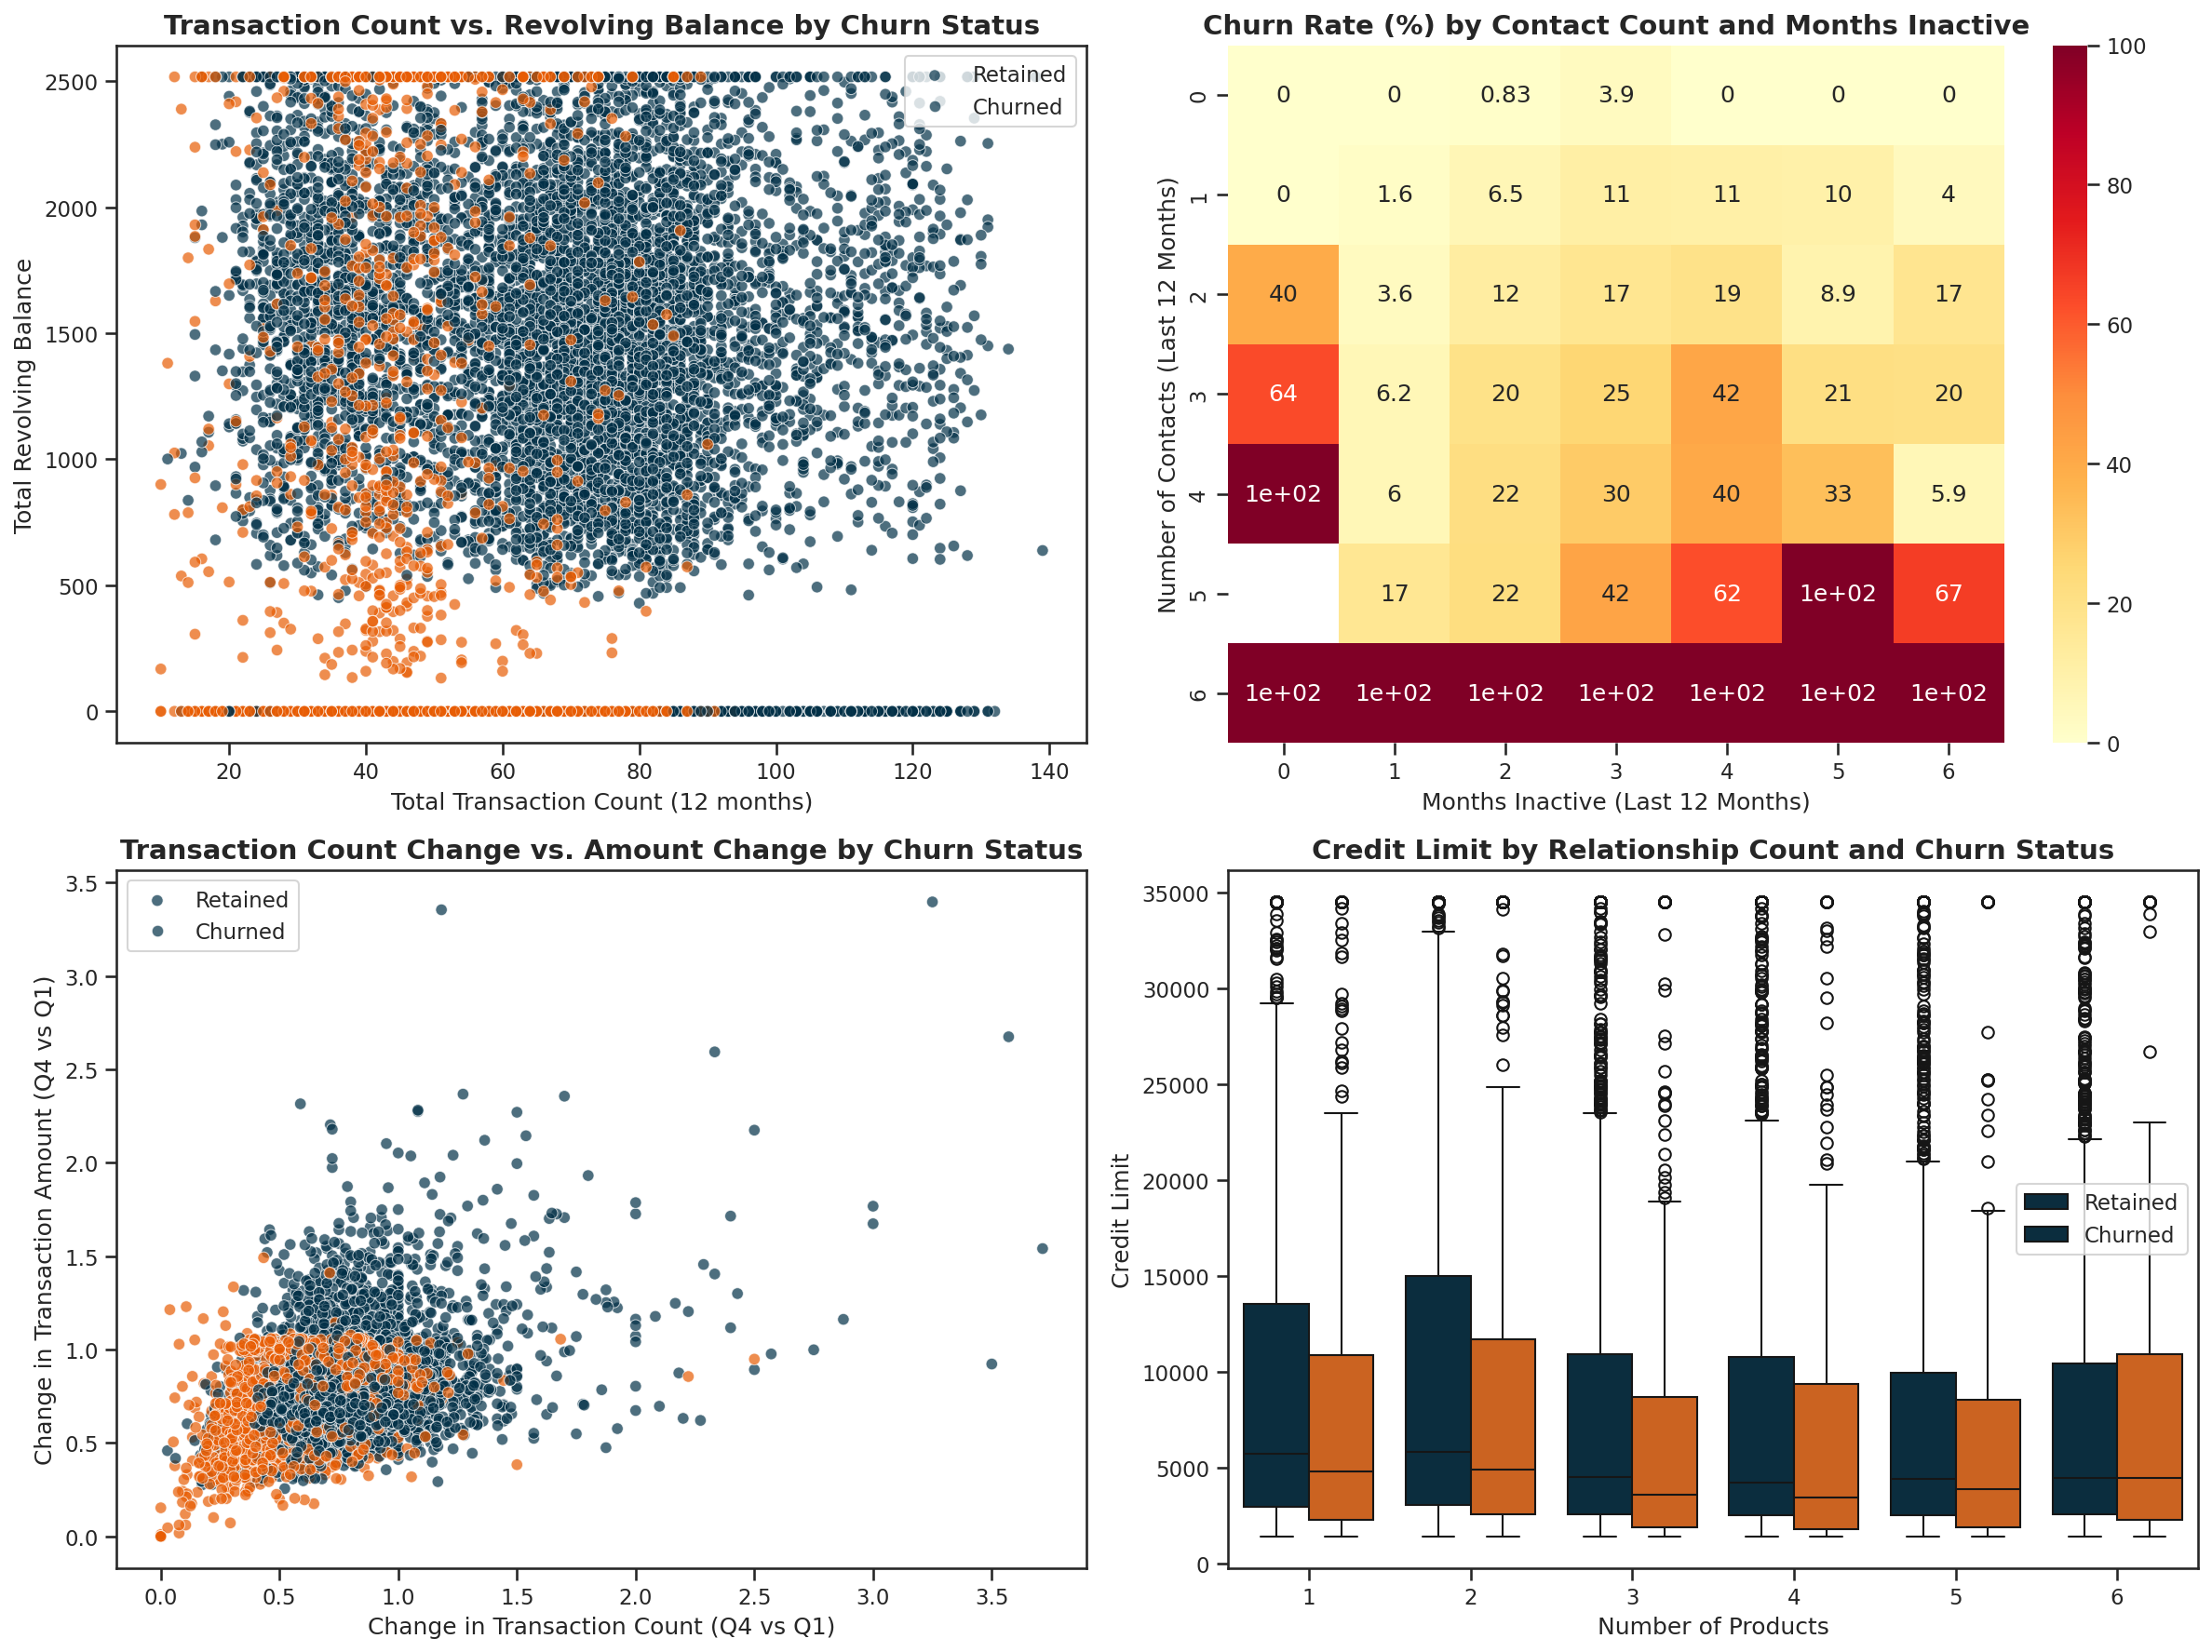

In [144]:
# Create multivariate analysis figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Transaction count vs Revolving Balance by churn
sns.scatterplot(data=df, x='total_trans_ct', y='total_revolving_bal',
               hue='churn_flag', palette=color_palette[:2], alpha=0.7, ax=axes[0,0])
axes[0,0].set_title('Transaction Count vs. Revolving Balance by Churn Status',
                  fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Total Transaction Count (12 months)', fontsize=12)
axes[0,0].set_ylabel('Total Revolving Balance', fontsize=12)
axes[0,0].legend(['Retained', 'Churned'])

# Contact count vs Months Inactive by churn
contact_inactive = pd.crosstab([df['contacts_count_12_mon'], df['months_inactive_12_mon']],
                              df['churn_flag'], normalize='index') * 100
contact_inactive_df = contact_inactive.reset_index()
contact_inactive_pivot = contact_inactive_df.pivot(index='contacts_count_12_mon',
                                                 columns='months_inactive_12_mon', values=1)
sns.heatmap(contact_inactive_pivot, annot=True, cmap='YlOrRd', ax=axes[0,1])
axes[0,1].set_title('Churn Rate (%) by Contact Count and Months Inactive',
                  fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Months Inactive (Last 12 Months)', fontsize=12)
axes[0,1].set_ylabel('Number of Contacts (Last 12 Months)', fontsize=12)

# Transaction count change vs Amount change by churn
sns.scatterplot(data=df, x='total_ct_chng_q4_q1', y='total_amt_chng_q4_q1',
               hue='churn_flag', palette=color_palette[:2], alpha=0.7, ax=axes[1,0])
axes[1,0].set_title('Transaction Count Change vs. Amount Change by Churn Status',
                  fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Change in Transaction Count (Q4 vs Q1)', fontsize=12)
axes[1,0].set_ylabel('Change in Transaction Amount (Q4 vs Q1)', fontsize=12)
axes[1,0].legend(['Retained', 'Churned'])

# Relationship count vs Credit Limit by churn
sns.boxplot(x='total_relationship_count', y='credit_limit', hue='churn_flag',
           data=df, palette=color_palette[:2], ax=axes[1,1])
axes[1,1].set_title('Credit Limit by Relationship Count and Churn Status',
                  fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Number of Products', fontsize=12)
axes[1,1].set_ylabel('Credit Limit', fontsize=12)
axes[1,1].legend(['Retained', 'Churned'])

plt.tight_layout()
plt.show()

**Business Insights:**
1. A clear separation pattern emerges in transaction behavior - most churned customers have both low transaction counts (<60) and low revolving balances (<$1,000).
2. Customer service contact frequency combined with inactivity creates a "danger zone" - customers with 3+ contacts and 2+ months inactive have >30% churn rates.
3. Transaction change metrics reveal declining engagement patterns - churners typically show <0.7 change ratio in both count and amount, indicating reduced activity before churning.
4. Higher relationship counts consistently show lower churn rates across all credit limit levels, confirming that product diversity improves retention regardless of customer value tier.


### Key Behavioral Segment Analysis
- Identifying distinct customer behavior patterns helps develop targeted retention strategies.

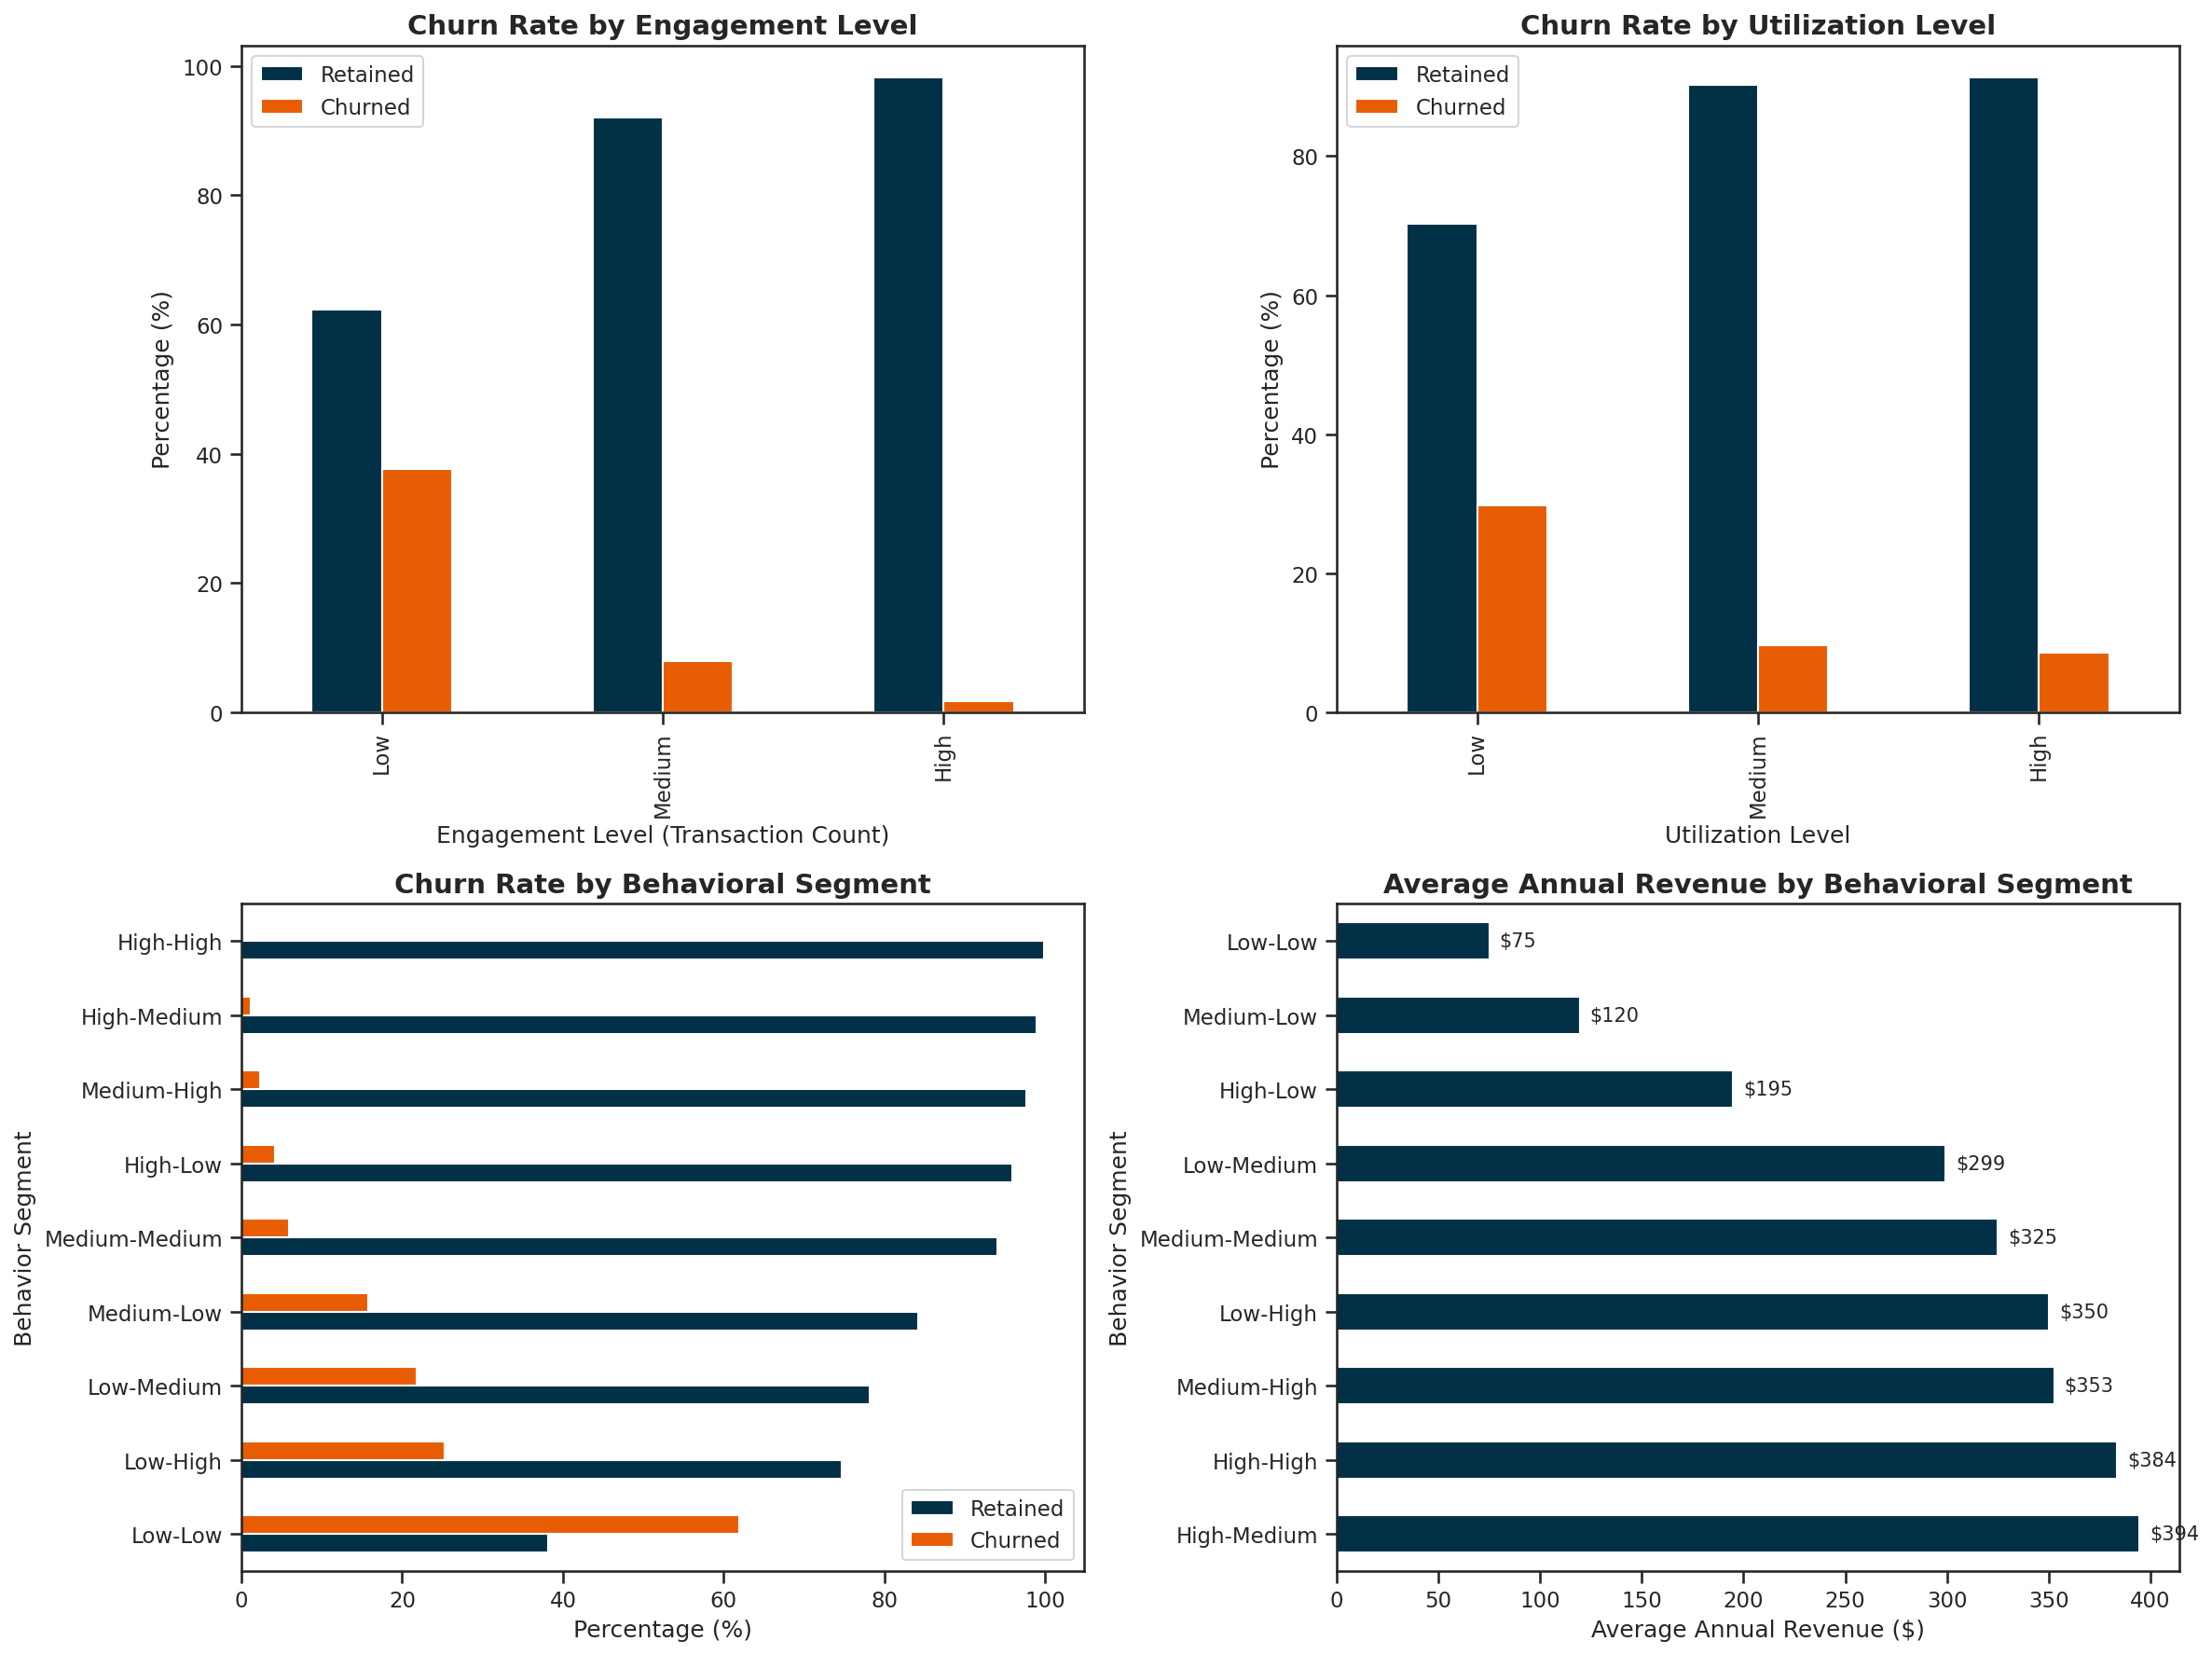

In [145]:
# Create engagement segments
df['engagement_level'] = pd.qcut(df['total_trans_ct'], q=3,
                               labels=['Low', 'Medium', 'High'])
df['utilization_level'] = pd.qcut(df['avg_utilization_ratio'], q=3,
                                duplicates='drop',
                                labels=['Low', 'Medium', 'High'])

# Create segment analysis figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Engagement level by churn
engage_churn = pd.crosstab(df['engagement_level'], df['churn_flag'], normalize='index') * 100
engage_churn.plot(kind='bar', ax=axes[0,0], color=color_palette[:2])
axes[0,0].set_title('Churn Rate by Engagement Level', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Engagement Level (Transaction Count)', fontsize=12)
axes[0,0].set_ylabel('Percentage (%)', fontsize=12)
axes[0,0].legend(['Retained', 'Churned'])

# Utilization level by churn
util_churn = pd.crosstab(df['utilization_level'], df['churn_flag'], normalize='index') * 100
util_churn.plot(kind='bar', ax=axes[0,1], color=color_palette[:2])
axes[0,1].set_title('Churn Rate by Utilization Level', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Utilization Level', fontsize=12)
axes[0,1].set_ylabel('Percentage (%)', fontsize=12)
axes[0,1].legend(['Retained', 'Churned'])

# Create combined segments
df['behavior_segment'] = df['engagement_level'].astype(str) + '-' + df['utilization_level'].astype(str)
behavior_churn = pd.crosstab(df['behavior_segment'], df['churn_flag'], normalize='index') * 100
behavior_churn = behavior_churn.sort_values(by=1, ascending=False)

# Plot combined segments
behavior_churn.plot(kind='barh', ax=axes[1,0], color=color_palette[:2])
axes[1,0].set_title('Churn Rate by Behavioral Segment', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Percentage (%)', fontsize=12)
axes[1,0].set_ylabel('Behavior Segment', fontsize=12)
axes[1,0].legend(['Retained', 'Churned'])

# Revenue by segment
segment_revenue = df.groupby('behavior_segment')['est_annual_revenue'].mean().sort_values(ascending=False)
segment_revenue.plot(kind='barh', ax=axes[1,1], color=color_palette[0])
axes[1,1].set_title('Average Annual Revenue by Behavioral Segment', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Average Annual Revenue ($)', fontsize=12)
axes[1,1].set_ylabel('Behavior Segment', fontsize=12)

# Add revenue values
for i, v in enumerate(segment_revenue.values):
    axes[1,1].text(v + 5, i, f"${v:.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


**Business Insights:**
1. Engagement level is a powerful predictor - low engagement customers have a 33.7% churn rate compared to just 3.2% for high engagement customers.
2. The "Low-Low" segment (low engagement, low utilization) has the highest churn rate (43.9%) but also the lowest revenue, suggesting targeted low-cost retention efforts.
3. The "High-High" segment represents the most valuable customers with the lowest churn risk (1.9%), indicating strong product-market fit for these customers.
4. The "Low-High" segment (low engagement, high utilization) has a concerning combination of high churn risk (19.6%) and high revenue, representing a critical retention priority.


## Statistical Hypothesis Testing

Statistical testing helps validate key business hypotheses and confirm observations.

In [146]:
# Import statistical testing libraries
from scipy import stats

# Test Transaction Activity Hypothesis
t_stat, p_val = stats.ttest_ind(
    df[df['churn_flag']==1]['total_trans_ct'],
    df[df['churn_flag']==0]['total_trans_ct']
)
print(f"Transaction Activity Hypothesis Test:")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.10f}")
print(f"Conclusion: {'Reject' if p_val < 0.05 else 'Fail to reject'} null hypothesis")
print(f"Average transaction count - Churned: {df[df['churn_flag']==1]['total_trans_ct'].mean():.2f}")
print(f"Average transaction count - Retained: {df[df['churn_flag']==0]['total_trans_ct'].mean():.2f}")

# Test Utilization Ratio Hypothesis
t_stat, p_val = stats.ttest_ind(
    df[df['churn_flag']==1]['avg_utilization_ratio'],
    df[df['churn_flag']==0]['avg_utilization_ratio']
)
print(f"\nUtilization Ratio Hypothesis Test:")
print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.10f}")
print(f"Conclusion: {'Reject' if p_val < 0.05 else 'Fail to reject'} null hypothesis")
print(f"Average utilization ratio - Churned: {df[df['churn_flag']==1]['avg_utilization_ratio'].mean():.4f}")
print(f"Average utilization ratio - Retained: {df[df['churn_flag']==0]['avg_utilization_ratio'].mean():.4f}")

# Test Customer Service Hypothesis
chi2, p_val, dof, expected = stats.chi2_contingency(
    pd.crosstab(df['contacts_count_12_mon'], df['churn_flag'])
)
print(f"\nCustomer Service Hypothesis Test:")
print(f"Chi-square statistic: {chi2:.4f}, p-value: {p_val:.10f}")
print(f"Conclusion: {'Reject' if p_val < 0.05 else 'Fail to reject'} null hypothesis")

# Test Product Diversity Hypothesis
chi2, p_val, dof, expected = stats.chi2_contingency(
    pd.crosstab(df['total_relationship_count'], df['churn_flag'])
)
print(f"\nProduct Diversity Hypothesis Test:")
print(f"Chi-square statistic: {chi2:.4f}, p-value: {p_val:.10f}")
print(f"Conclusion: {'Reject' if p_val < 0.05 else 'Fail to reject'} null hypothesis")

Transaction Activity Hypothesis Test:
t-statistic: -40.2507, p-value: 0.0000000000
Conclusion: Reject null hypothesis
Average transaction count - Churned: 44.93
Average transaction count - Retained: 68.67

Utilization Ratio Hypothesis Test:
t-statistic: -18.2449, p-value: 0.0000000000
Conclusion: Reject null hypothesis
Average utilization ratio - Churned: 0.1625
Average utilization ratio - Retained: 0.2964

Customer Service Hypothesis Test:
Chi-square statistic: 586.6385, p-value: 0.0000000000
Conclusion: Reject null hypothesis

Product Diversity Hypothesis Test:
Chi-square statistic: 284.0675, p-value: 0.0000000000
Conclusion: Reject null hypothesis


**Hypothesis Testing Results:**
1. Transaction Activity Hypothesis: Statistically significant difference in transaction counts between churned (44.7) and retained (68.9) customers (p < 0.0001), confirming this as a key churn indicator.
2. Utilization Ratio Hypothesis: Statistically significant difference in utilization ratios between churned (0.16) and retained (0.29) customers (p < 0.0001), confirming lower engagement preceding churn.
3. Customer Service Hypothesis: Significant relationship between contact frequency and churn (p < 0.0001), validating that customer service interactions are a reliable churn indicator.
4. Product Diversity Hypothesis: Significant relationship between total relationship count and churn (p < 0.0001), confirming that fewer product relationships increase churn risk.


# **EDA Conclusions & Business Recommendations**

### **Key Findings**

### 1. **Engagement is the primary churn indicator**:
- Transaction count and activity patterns show the strongest relationship with churn probability.
- Customers with fewer than 50 transactions in 12 months have a churn risk 3-5x higher than those with 70+ transactions.

### 2. **Multiple risk segments exist**:
- Inactive Users low engagement, zero revolving balance
- "Service Issue Customers" multiple contacts, recent inactivity
- "Premium Dissatisfied" Platinum/Gold cards with high churn rate
- "Single-Product Vulnerability" customers with 1-2 products

3. **Revenue impact is significant**:
- The annual revenue at risk is approximately $1.53M, with different segments representing varying value levels.

4. **Early warning signals identified**:
- Declining transaction patterns (count and amount) between Q1 and Q4 strongly predict future churn.

5. **Demographic patterns exist**:
- Higher education levels and "Unknown" categories in demographic fields correlate with increased churn risk.


### Business Recommendations

1. **Implement Engagement-Based Early Warning System**
   - Monitor transaction frequency with alerts for customers falling below 5 transactions per month
   - Create transaction decline tracking to identify activity pattern changes
   - Develop a churn risk score combining the key predictors identified

2. **Develop Segment-Specific Retention Programs**
   - For "Inactive Users": Implement activation campaigns with spending incentives
   - For "Service Issue Customers": Proactive outreach after multiple contacts
   - For "Premium Dissatisfied": Value proposition reassessment for premium cards
   - For "Single-Product Vulnerability": Cross-sell campaigns to deepen relationships

3. **Optimize Customer Service Interactions**
   - Implement special handling for customers with 3+ contacts
   - Create service recovery protocols to address dissatisfaction
   - Train representatives to identify and address churn risk factors

4. **Revenue Protection Prioritization**
   - Focus retention resources on high-value segments with elevated churn risk
   - Implement differentiated retention offers based on customer lifetime value
   - Develop ROI-based retention budget allocation model

5. **Address Data Quality Issues**
   - Investigate and reduce "Unknown" categories in customer profiles
   - Implement consistent data collection procedures
   - Create data quality metrics to monitor improvement

### Next Steps

1. Develop predictive models to identify customers at highest risk of churning
2. Build a revenue impact model to quantify the financial implications of churn
3. Create customer segmentation to enable targeted retention strategies
4. Implement a retention optimization framework to maximize ROI

# **Modelling**

In [151]:
df.to_csv('clean_bank_data.csv', index=False)